### Buzz Prediction on Twitter Part 2

Project Description:
- Applying two models with bagging and two models with pasting.
- Applying two models with adaboost boosting
- Applying one model with gradient boosting
- Applying PCA on data and then applying all the models in project again on data you get from PCA.
- Applying deep learning model.


###   I (a). Importing required libraries (<b>data</b>)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

### I (b). Reading and viewing the dataset for Regression task (<b>data</b>)

In [3]:
data = pd.read_csv('twitter.data', header=None)

In [4]:
namesList = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0', 'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6','AS(NA)_0', 'AS(NA)_1', 'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4','AS(NA)_5', 'AS(NA)_6', 'BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'NAC_0', 'NAC_1', 'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6','AS(NAC)_0', 'AS(NAC)_1', 'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4','AS(NAC)_5', 'AS(NAC)_6' , 'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6', 'AT_0', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6', 'NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4', 'NA_5', 'NA_6', 'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5', 'ADL_6',  'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4', 'NAD_5', 'NAD_6','buzz']

In [5]:
data.columns = namesList

In [6]:
data.head()
len(data)

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,buzz
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


583250

###  I (d). Proceeding with the Regression Task (<b>data</b>)

<b>  Viewing the data and it's summary statistics

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
NCD_0        583250 non-null int64
NCD_1        583250 non-null int64
NCD_2        583250 non-null int64
NCD_3        583250 non-null int64
NCD_4        583250 non-null int64
NCD_5        583250 non-null int64
NCD_6        583250 non-null int64
AI_0         583250 non-null int64
AI_1         583250 non-null int64
AI_2         583250 non-null int64
AI_3         583250 non-null int64
AI_4         583250 non-null int64
AI_5         583250 non-null int64
AI_6         583250 non-null int64
AS(NA)_0     583250 non-null float64
AS(NA)_1     583250 non-null float64
AS(NA)_2     583250 non-null float64
AS(NA)_3     583250 non-null float64
AS(NA)_4     583250 non-null float64
AS(NA)_5     583250 non-null float64
AS(NA)_6     583250 non-null float64
BL_0         583250 non-null float64
BL_1         583250 non-null float64
BL_2         583250 non-null float64
BL_3         583250 non-null 

We can see that all of our variables are integer and float. We do not have any categorical variables

In [8]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,buzz
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [9]:
data.shape

(583250, 78)

<b>Looking for missing values </b>

In [10]:
sum(data.isnull().sum()>0)

0

 It appears that the data set has been cleaned, there are no missing values in our dataset. I will proceed with looking at the correlation matrix and the distribution of each of the variables 

<b>  Looking at the correlation matrix for our data </b>

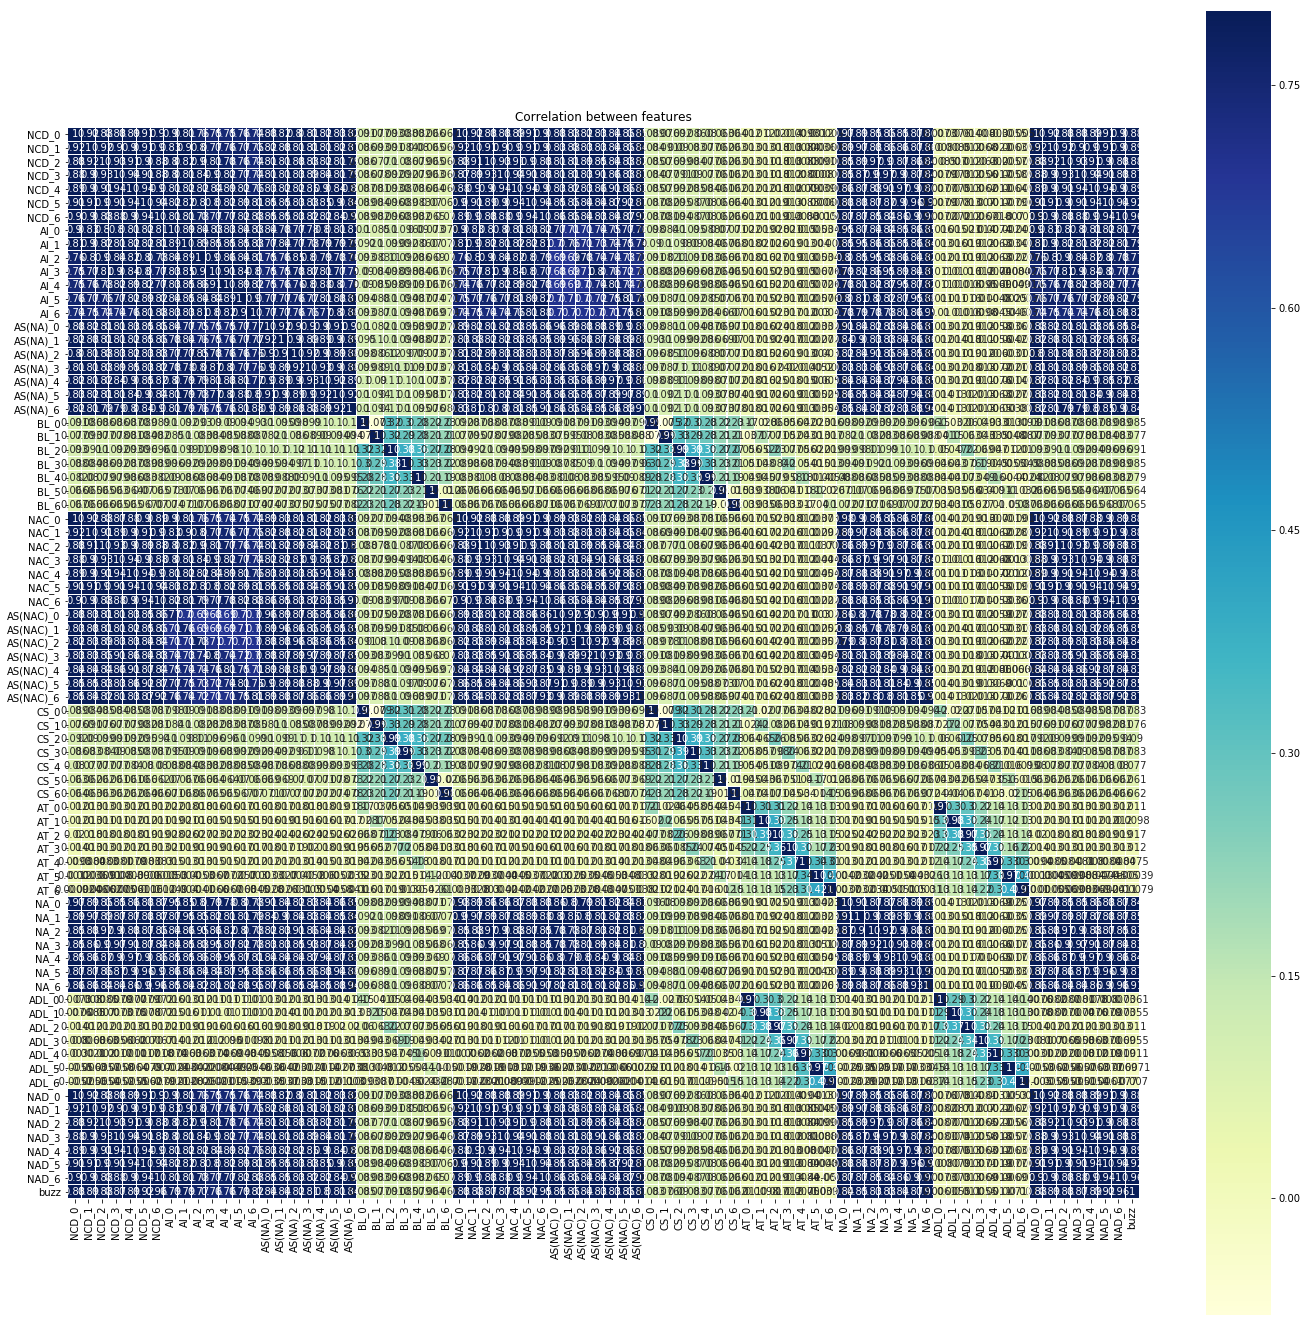

In [12]:
plt.figure(figsize = (24,24))
sns.heatmap(data.corr(), vmax=0.8, linewidths=0.01,
            square=True, annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

 It can be seen clearly that our data has quite a lot of variables that are correlated with each other. We can notice this with some clear patterns in our correlation matrix. We would ideally expect there to be some correlation in data for an attribute which is collected over t time periods as is the case with some of our variables (NCD, AI, AS(NA), NAC etc). But there are strong correlations between variables(NAC & NAD, AS(NAC) & NAD etc.) as well. There correlation will exist since are variables from the look of it appear to be related to each other. For instance the Number of Created Discussions would infact have an effect on Author Increase.

#### <b> Looking at the distribution of our all other variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD821328D0>]],
      dtype=object)

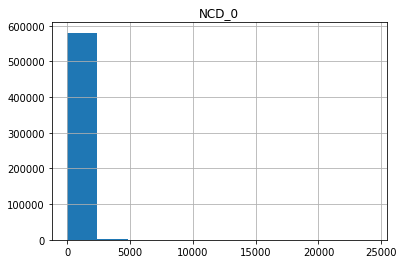

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD85016A20>]],
      dtype=object)

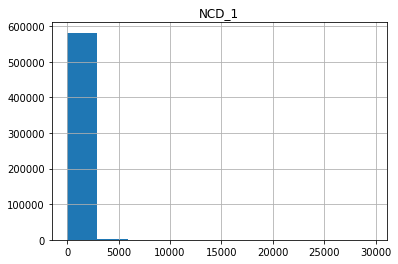

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD85078748>]],
      dtype=object)

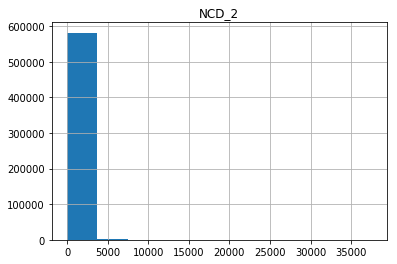

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD854DB080>]],
      dtype=object)

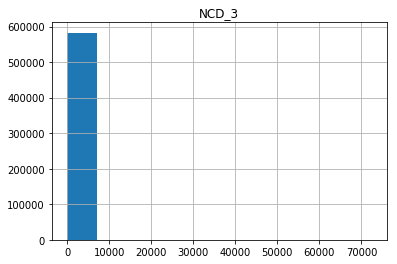

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDB6D16390>]],
      dtype=object)

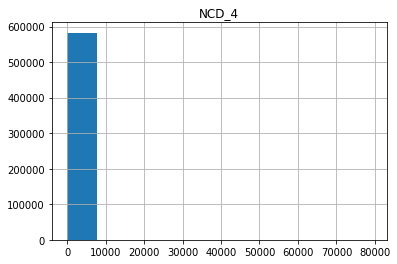

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82CF5B38>]],
      dtype=object)

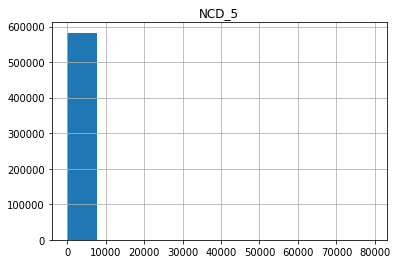

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDB6D67C50>]],
      dtype=object)

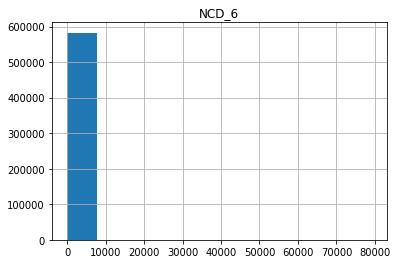

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84C1B358>]],
      dtype=object)

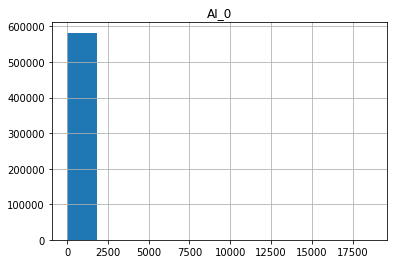

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82CF5BA8>]],
      dtype=object)

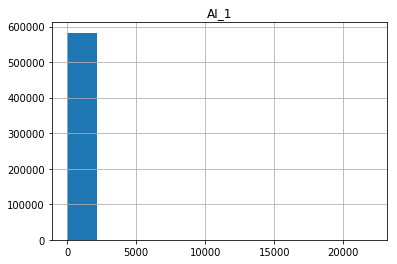

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84BB9DD8>]],
      dtype=object)

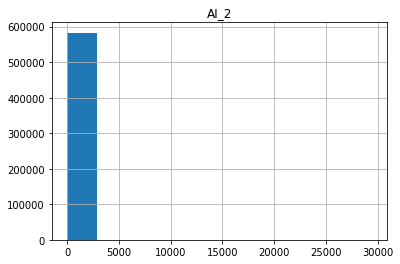

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD83838E48>]],
      dtype=object)

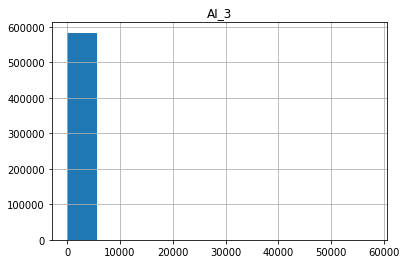

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD845EA588>]],
      dtype=object)

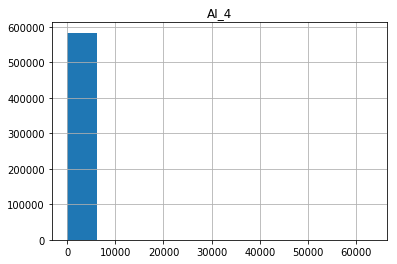

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8204F0B8>]],
      dtype=object)

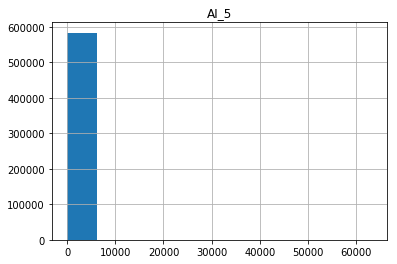

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD821BCB38>]],
      dtype=object)

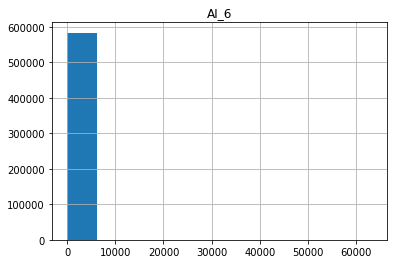

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8269E5F8>]],
      dtype=object)

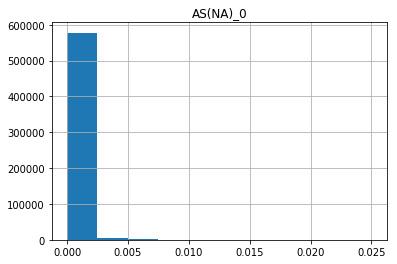

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8224FE48>]],
      dtype=object)

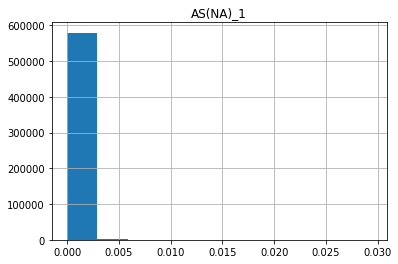

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD822CA780>]],
      dtype=object)

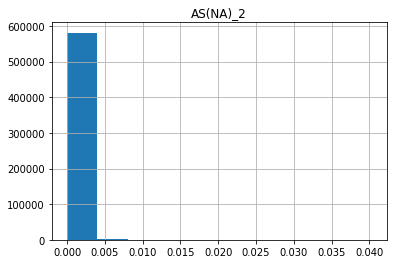

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD821BC908>]],
      dtype=object)

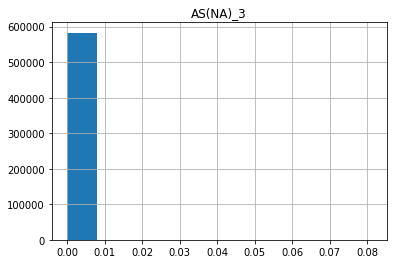

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8237B6A0>]],
      dtype=object)

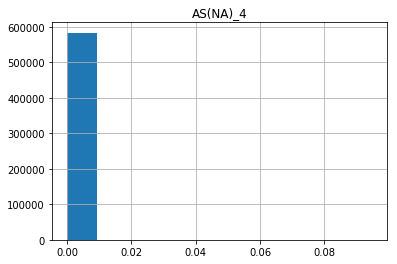

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD845EA668>]],
      dtype=object)

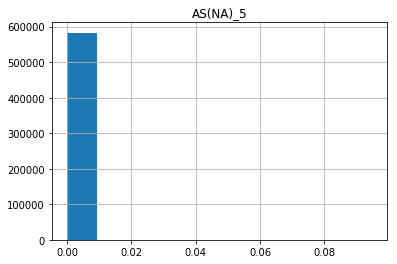

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82D450F0>]],
      dtype=object)

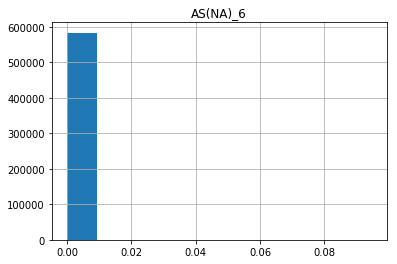

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDB6D3CB00>]],
      dtype=object)

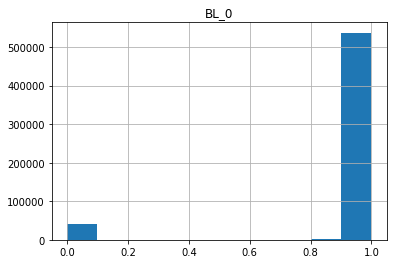

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD821DE8D0>]],
      dtype=object)

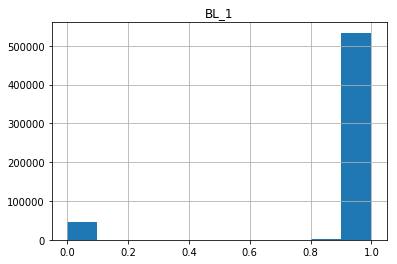

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDB6D9BFD0>]],
      dtype=object)

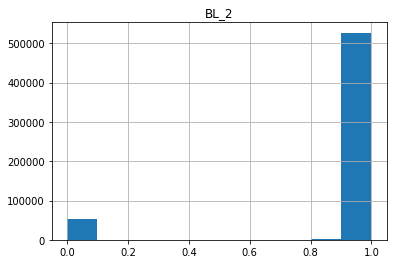

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8212AB00>]],
      dtype=object)

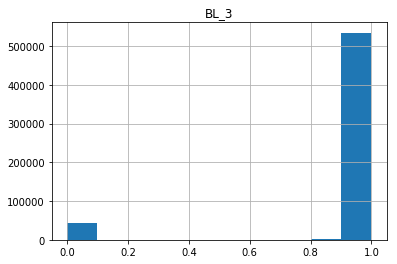

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8218EB00>]],
      dtype=object)

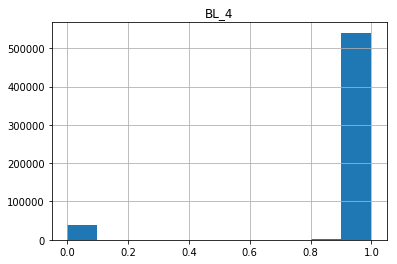

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82037CF8>]],
      dtype=object)

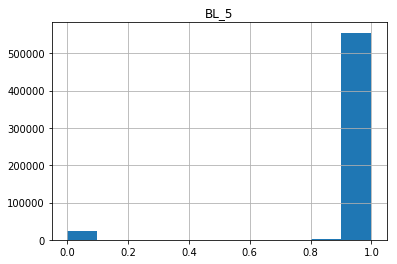

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84BDA048>]],
      dtype=object)

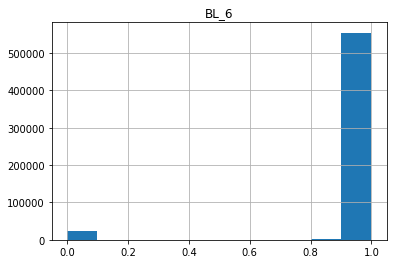

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84C58E48>]],
      dtype=object)

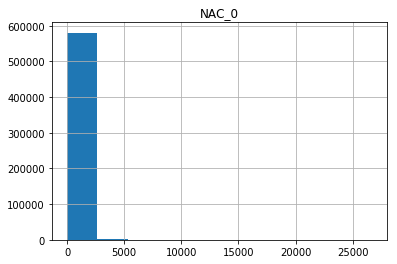

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82094828>]],
      dtype=object)

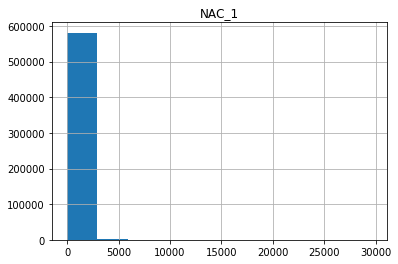

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82D6D5F8>]],
      dtype=object)

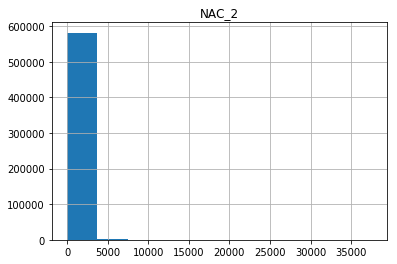

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84C41710>]],
      dtype=object)

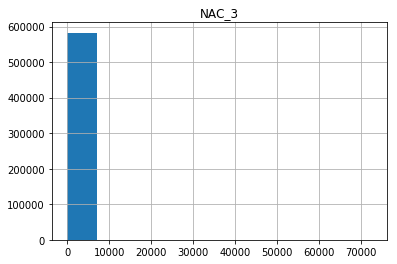

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD850A2C88>]],
      dtype=object)

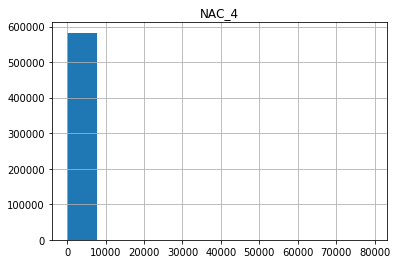

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD850208D0>]],
      dtype=object)

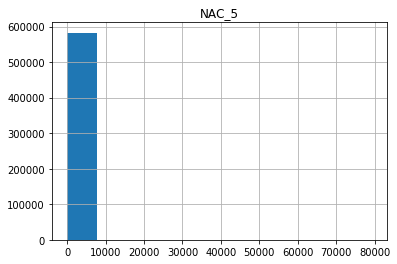

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84C4C7B8>]],
      dtype=object)

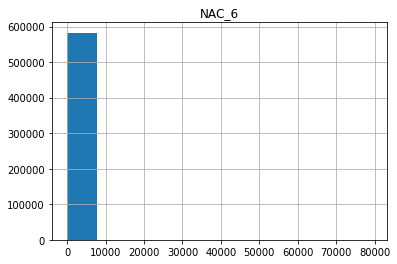

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82D66CF8>]],
      dtype=object)

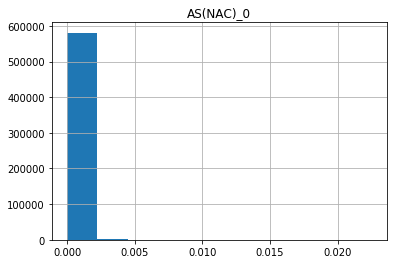

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD820EF860>]],
      dtype=object)

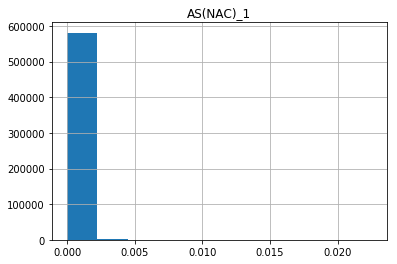

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDB6D44EB8>]],
      dtype=object)

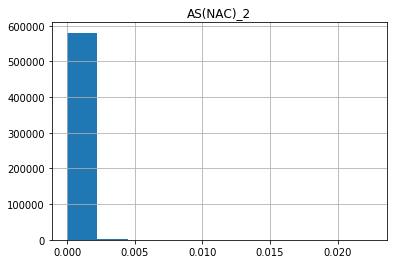

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82D0BA20>]],
      dtype=object)

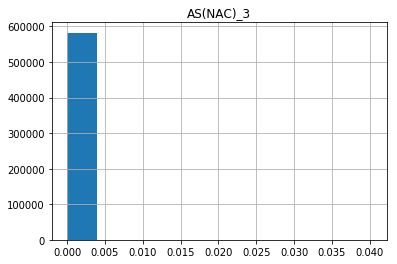

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8210EB70>]],
      dtype=object)

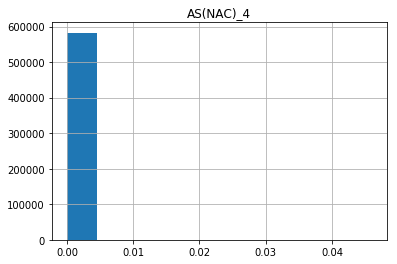

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82D21C50>]],
      dtype=object)

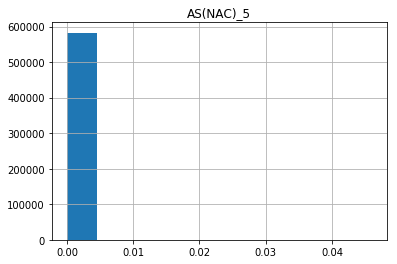

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDB6DB0208>]],
      dtype=object)

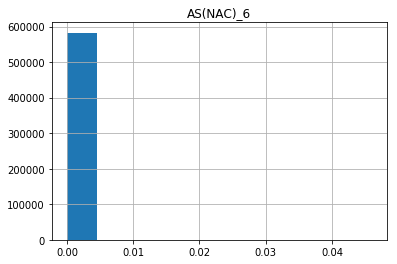

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82D216D8>]],
      dtype=object)

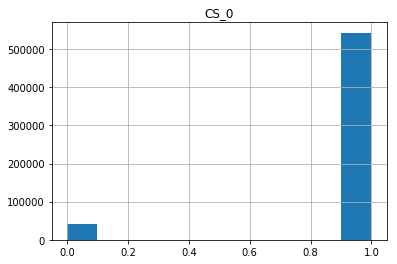

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8269E0B8>]],
      dtype=object)

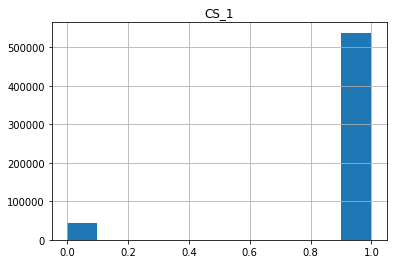

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD821DBCF8>]],
      dtype=object)

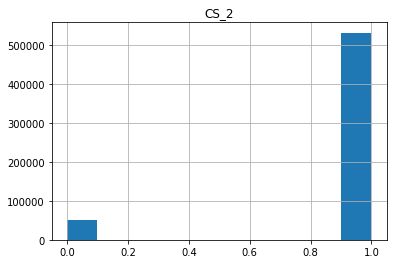

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD821FE898>]],
      dtype=object)

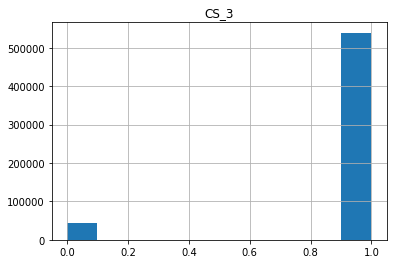

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD822170F0>]],
      dtype=object)

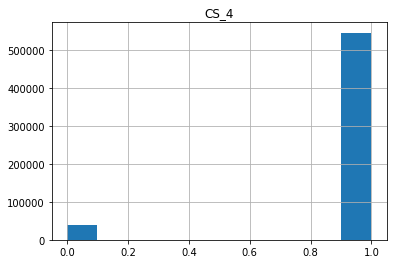

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD822ACB00>]],
      dtype=object)

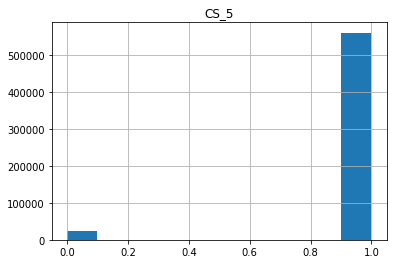

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8269E438>]],
      dtype=object)

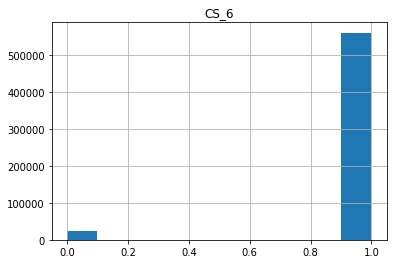

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8204B2B0>]],
      dtype=object)

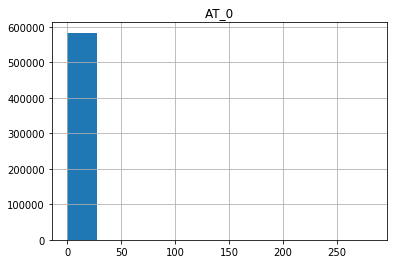

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82D1E860>]],
      dtype=object)

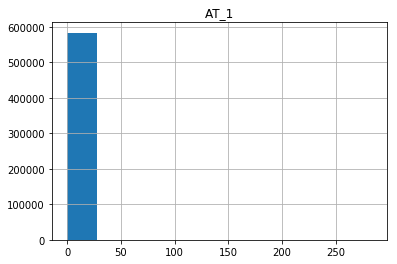

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDB6D665F8>]],
      dtype=object)

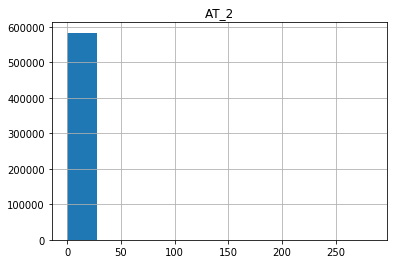

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82CE8CC0>]],
      dtype=object)

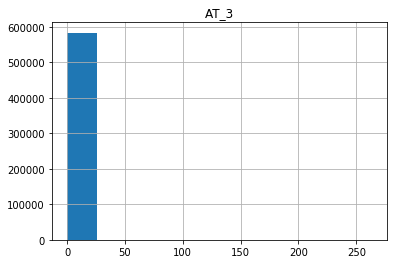

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8268C860>]],
      dtype=object)

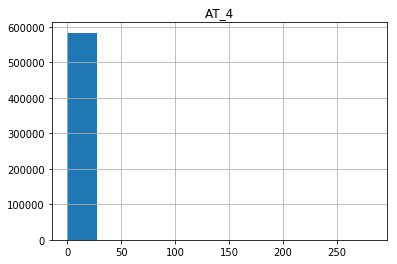

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDB6D66DA0>]],
      dtype=object)

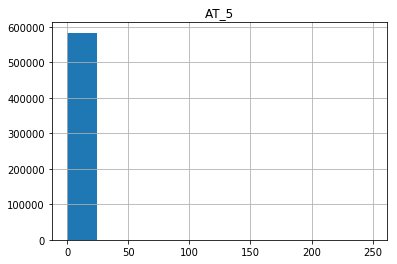

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84C12C18>]],
      dtype=object)

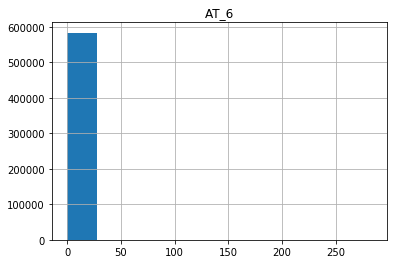

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84C49BE0>]],
      dtype=object)

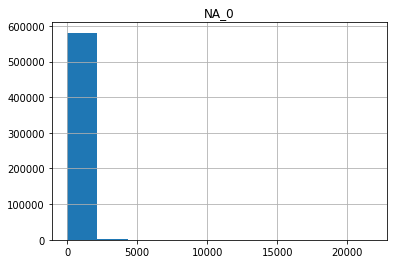

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8218E7B8>]],
      dtype=object)

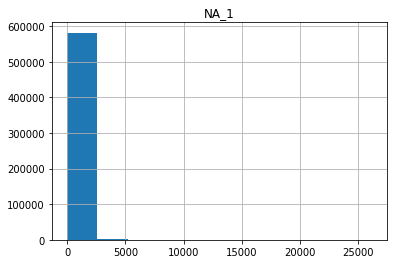

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84C44C88>]],
      dtype=object)

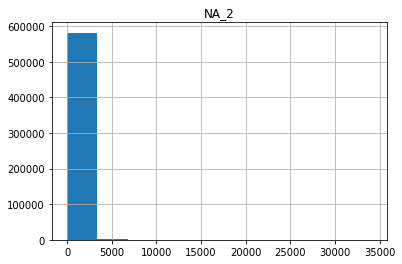

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82097AC8>]],
      dtype=object)

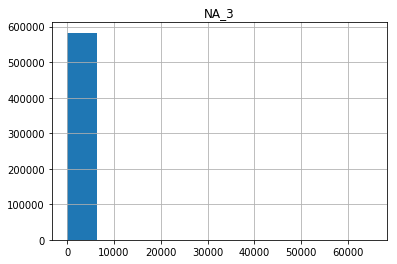

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD823DB780>]],
      dtype=object)

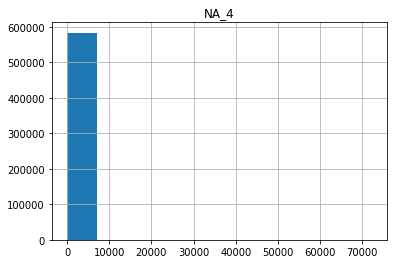

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84646FD0>]],
      dtype=object)

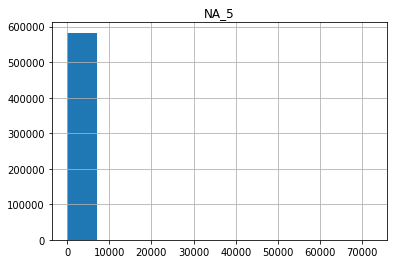

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD854BE7B8>]],
      dtype=object)

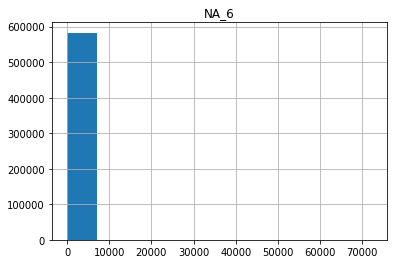

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD823F99E8>]],
      dtype=object)

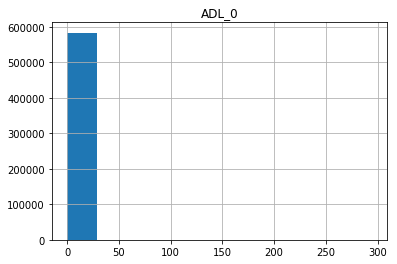

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82D4AA58>]],
      dtype=object)

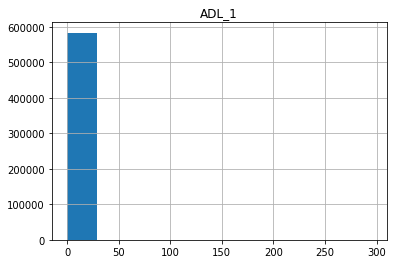

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD850236D8>]],
      dtype=object)

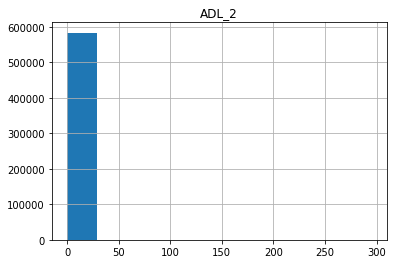

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BDB6D427F0>]],
      dtype=object)

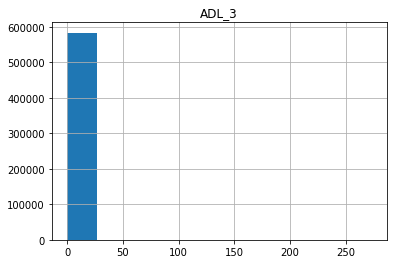

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD85008668>]],
      dtype=object)

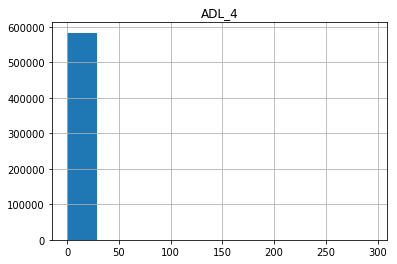

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8223EA90>]],
      dtype=object)

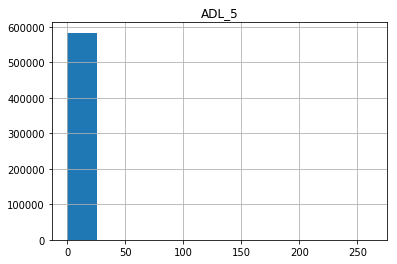

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82111978>]],
      dtype=object)

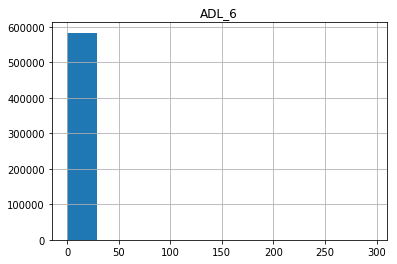

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD8501C6A0>]],
      dtype=object)

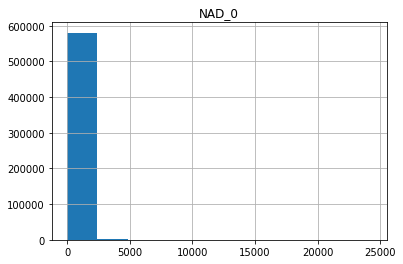

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84C01FD0>]],
      dtype=object)

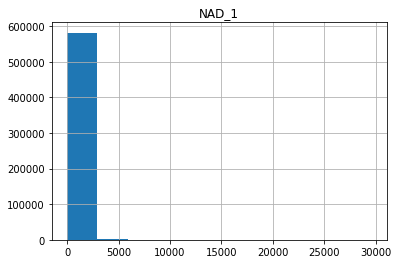

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84C014A8>]],
      dtype=object)

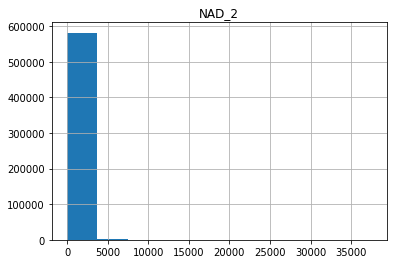

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84C47780>]],
      dtype=object)

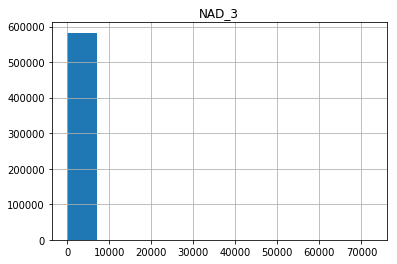

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD821D8C50>]],
      dtype=object)

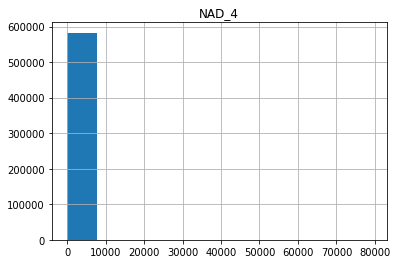

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD822AD240>]],
      dtype=object)

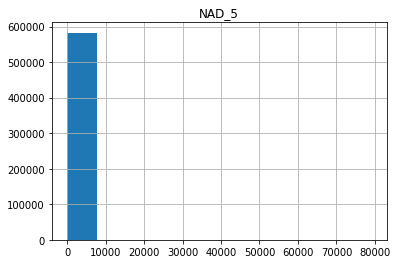

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD82311630>]],
      dtype=object)

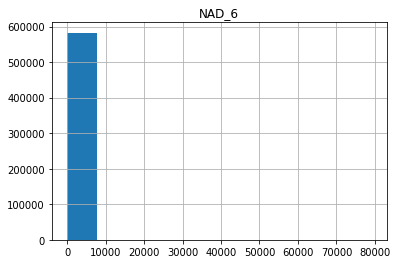

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD84616240>]],
      dtype=object)

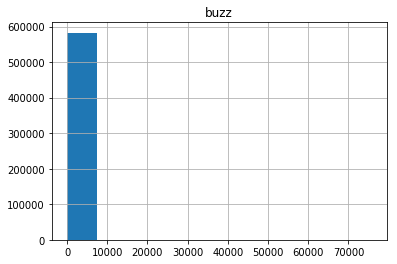

In [13]:
for i in data.columns:
    data.hist(column=i)
    plt.show()

Looking at the distribution of our response variable did not prove helpful as our data is extremely skewed, the standard deviations are very high and the numbers range from 0 to 80000. It is clear that we have quite a lot of outliers in our dataset.

#### <b> Using IQR we try to count the number of outliers we can in every column in our dataset

In [14]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,buzz
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [15]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [16]:
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

NCD_0        79878
NCD_1        80382
NCD_2        81462
NCD_3        81434
NCD_4        82010
NCD_5        81819
NCD_6        82162
AI_0         75182
AI_1         75528
AI_2         76659
AI_3         77224
AI_4         78112
AI_5         77998
AI_6         78195
AS(NA)_0     80611
AS(NA)_1     81790
AS(NA)_2     81299
AS(NA)_3     81138
AS(NA)_4     80901
AS(NA)_5     80806
AS(NA)_6     81281
BL_0        134578
BL_1        134224
BL_2        143132
BL_3        140806
BL_4        139082
BL_5        129184
BL_6        131892
NAC_0        79304
NAC_1        80351
             ...  
CS_6         22965
AT_0        125882
AT_1        131422
AT_2        135221
AT_3        126739
AT_4        117746
AT_5        102225
AT_6        102636
NA_0         77947
NA_1         78641
NA_2         79725
NA_3         80314
NA_4         80883
NA_5         80736
NA_6         81212
ADL_0       131251
ADL_1       136415
ADL_2       140616
ADL_3       130105
ADL_4       123493
ADL_5       107158
ADL_6       

We can see that the count of outliers in almost all of our variables in the data set is quite high. For that very reason we will have to use a scaling technique that would help us correct for this. We have selected <b> RobustScaler </b> because even though we have extreme outliers in our data, we believe that they hold importace in our dataset and we don't want to lose any useful information in the process. MinMaxScaler is sensitive to outliers, hence we did not use it. Also, since our variables are not normally distributed, we decided not to use StandardScaler.

### Preparing the data for running Machine Learning Models

#### <b> Random sampling and preparing dataset for test and train split

In [7]:
datanew = data.copy()
X = datanew.drop(columns=['buzz'])
y = datanew['buzz']
X.head()
X.shape
y.shape
y.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,1.0,0,2,0,0,1,1,1
1,2,1,0,0,0,0,4,2,1,0,...,0.0,0.0,1.0,2,1,0,0,0,0,4
2,1,0,0,0,0,4,1,1,0,0,...,0.0,1.0,1.0,1,0,0,0,0,4,1
3,1,0,0,1,0,0,1,1,0,0,...,0.0,0.0,1.0,1,0,0,1,0,0,1
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,1.0,0,1,0,0,1,2,3


(583250, 77)

(583250,)

0    0.0
1    0.5
2    0.0
3    2.5
4    0.5
Name: buzz, dtype: float64

#### Dividing Data into X and Y and then splitting the dataset into train and test dataset and then normalizing it
As we saw above from the distribution, we need to scale the data to understand the effect of variables on the response variable 'buzz'.


In [8]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1,random_state = 10)
sample_data.shape
sample_target.shape

(58325, 77)

(58325,)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sample_data,sample_target, test_size = 0.33, random_state = 10)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(39077, 77)

(19248, 77)

(39077,)

(19248,)

#### Scaling Data using RobustScaler Scaler 
 We can see that the count of outliers in almost all of our variables in the data set is quite high. For that very reason we will have to use a scaling technique that would help us correct for this. We have selected  <b> RobustScaler </b> because even though we have extreme outliers in our data, we believe that they hold importace in our dataset and we don't want to lose any useful information in the process. MinMaxScaler is sensitive to outliers, hence we did not use it. Also, since our variables are not normally distributed, we decided not to use StandardScaler. Also, as can be seen below in the histograms, I think that robust scaler does the best job in retaining characteristics of our variables
    

(39077, 77)

(19248, 77)

(array([24.,  8.,  9.,  7.,  3.,  7.,  8.,  1.,  4.,  6.]),
 array([-0.025641  ,  0.12772858,  0.28109816,  0.43446774,  0.58783733,
         0.74120691,  0.89457649,  1.04794607,  1.20131565,  1.35468523,
         1.50805482]),
 <a list of 10 Patch objects>)

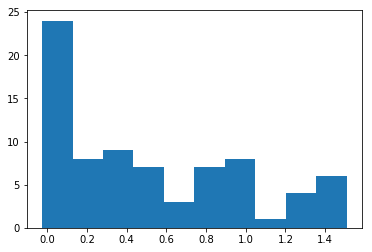

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  2., 71.,  2.]),
 array([-18.999848  , -16.69834708, -14.39684615, -12.09534523,
         -9.7938443 ,  -7.49234338,  -5.19084245,  -2.88934153,
         -0.5878406 ,   1.71366032,   4.01516125]),
 <a list of 10 Patch objects>)

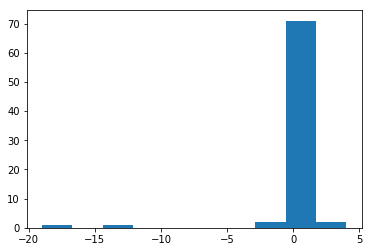

(array([63.,  0.,  1.,  2.,  1.,  4.,  3.,  0.,  1.,  2.]),
 array([-0.025641  ,  1.37928667,  2.78421435,  4.18914202,  5.5940697 ,
         6.99899737,  8.40392504,  9.80885272, 11.21378039, 12.61870807,
        14.02363574]),
 <a list of 10 Patch objects>)

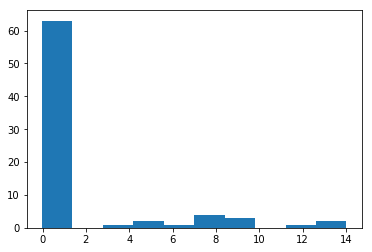

(array([15.,  6., 12., 15.,  7.,  8.,  8.,  3.,  0.,  3.]),
 array([-0.008547  ,  0.26937192,  0.54729084,  0.82520976,  1.10312868,
         1.3810476 ,  1.65896652,  1.93688544,  2.21480436,  2.49272328,
         2.7706422 ]),
 <a list of 10 Patch objects>)

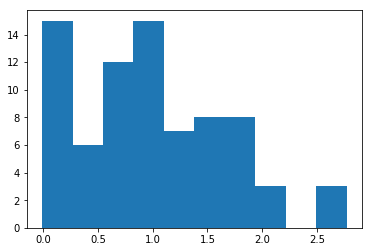

(array([69.,  0.,  3.,  2.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([-0.20512821,  1.20109791,  2.60732403,  4.01355014,  5.41977626,
         6.82600238,  8.23222849,  9.63845461, 11.04468073, 12.45090684,
        13.85713296]),
 <a list of 10 Patch objects>)

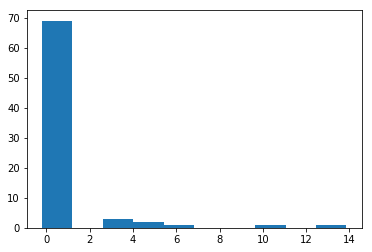

(array([14.,  3., 28., 13.,  8.,  6.,  1.,  1.,  2.,  1.]),
 array([-0.016949  ,  0.35603154,  0.72901209,  1.10199263,  1.47497317,
         1.84795372,  2.22093426,  2.59391481,  2.96689535,  3.33987589,
         3.71285644]),
 <a list of 10 Patch objects>)

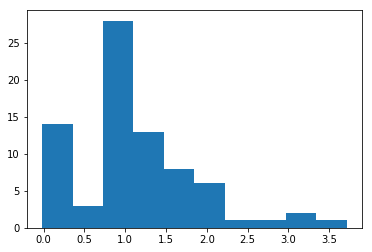

(array([63.,  2.,  3.,  3.,  2.,  1.,  0.,  1.,  0.,  2.]),
 array([-0.166667  ,  0.64444479,  1.45555659,  2.26666838,  3.07778018,
         3.88889197,  4.70000377,  5.51111556,  6.32222736,  7.13333915,
         7.94445094]),
 <a list of 10 Patch objects>)

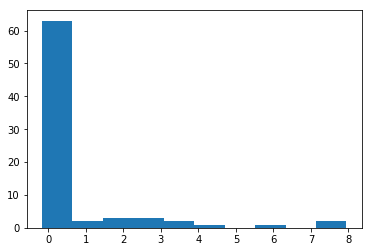

(array([ 9., 33.,  7.,  0.,  0.,  0.,  0.,  0.,  0., 28.]),
 array([-0.20238095, -0.18214286, -0.16190476, -0.14166667, -0.12142857,
        -0.10119048, -0.08095238, -0.06071429, -0.04047619, -0.0202381 ,
         0.        ]),
 <a list of 10 Patch objects>)

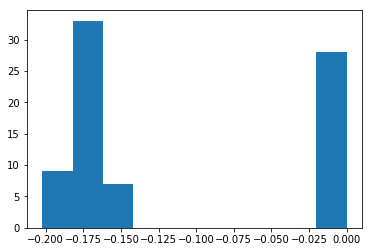

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 75.]),
 array([-17.999856 , -16.1998704, -14.3998848, -12.5998992, -10.7999136,
         -8.999928 ,  -7.1999424,  -5.3999568,  -3.5999712,  -1.7999856,
          0.       ]),
 <a list of 10 Patch objects>)

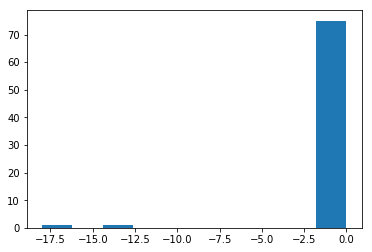

(array([15.,  8.,  5.,  3.,  9.,  7., 14.,  6.,  7.,  3.]),
 array([-0.013636  ,  0.6172358 ,  1.24810759,  1.87897939,  2.50985119,
         3.14072298,  3.77159478,  4.40246658,  5.03333837,  5.66421017,
         6.29508197]),
 <a list of 10 Patch objects>)

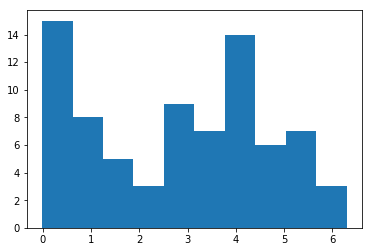

(array([ 9., 34., 14.,  4.,  5.,  3.,  6.,  0.,  0.,  2.]),
 array([-0.1025641 , -0.01480769,  0.07294872,  0.16070513,  0.24846154,
         0.33621795,  0.42397436,  0.51173077,  0.59948718,  0.68724359,
         0.775     ]),
 <a list of 10 Patch objects>)

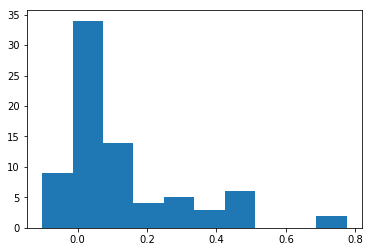

(array([65.,  4.,  1.,  1.,  4.,  0.,  0.,  0.,  0.,  2.]),
 array([-3.03030303e-02,  3.35047845e+00,  6.73125993e+00,  1.01120414e+01,
         1.34928229e+01,  1.68736044e+01,  2.02543859e+01,  2.36351673e+01,
         2.70159488e+01,  3.03967303e+01,  3.37775118e+01]),
 <a list of 10 Patch objects>)

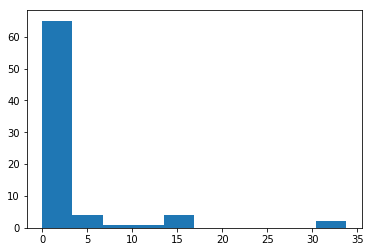

(array([ 1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0., 73.]),
 array([-19.52934284, -17.57640855, -15.62347427, -13.67053999,
        -11.7176057 ,  -9.76467142,  -7.81173714,  -5.85880285,
         -3.90586857,  -1.95293428,   0.        ]),
 <a list of 10 Patch objects>)

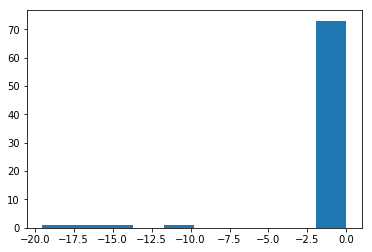

(array([45., 18.,  0.,  5.,  2.,  0.,  4.,  2.,  0.,  1.]),
 array([ 0.        ,  1.06395349,  2.12790698,  3.19186047,  4.25581395,
         5.31976744,  6.38372093,  7.44767442,  8.51162791,  9.5755814 ,
        10.63953488]),
 <a list of 10 Patch objects>)

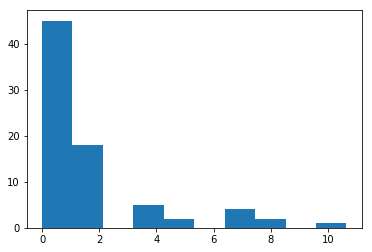

(array([10., 14., 17.,  2.,  5.,  1.,  0.,  0.,  0., 28.]),
 array([-0.19767442, -0.17790698, -0.15813953, -0.13837209, -0.11860465,
        -0.09883721, -0.07906977, -0.05930233, -0.03953488, -0.01976744,
         0.        ]),
 <a list of 10 Patch objects>)

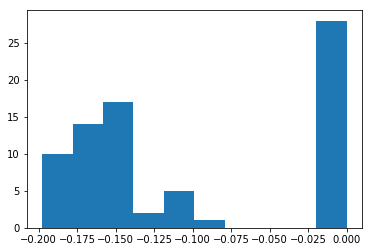

(array([66.,  2.,  4.,  2.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([-0.03125   ,  0.82628375,  1.6838175 ,  2.54135125,  3.398885  ,
         4.25641875,  5.11395249,  5.97148624,  6.82901999,  7.68655374,
         8.54408749]),
 <a list of 10 Patch objects>)

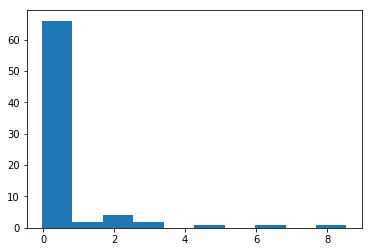

(array([15., 16.,  6.,  7.,  4.,  0.,  0.,  1.,  0., 28.]),
 array([-0.17088608, -0.15379747, -0.13670886, -0.11962025, -0.10253165,
        -0.08544304, -0.06835443, -0.05126582, -0.03417722, -0.01708861,
         0.        ]),
 <a list of 10 Patch objects>)

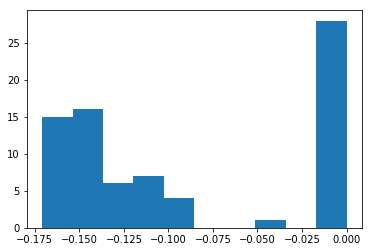

(array([28.,  0.,  4.,  5., 11.,  7., 11.,  4.,  3.,  4.]),
 array([0.        , 0.13535354, 0.27070707, 0.40606061, 0.54141414,
        0.67676768, 0.81212121, 0.94747475, 1.08282828, 1.21818182,
        1.35353535]),
 <a list of 10 Patch objects>)

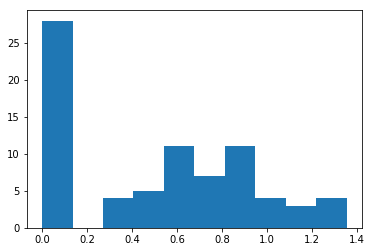

(array([18.,  9.,  3.,  8.,  4.,  8.,  3.,  8.,  9.,  7.]),
 array([-0.005682  ,  0.11048253,  0.22664706,  0.34281159,  0.45897612,
         0.57514065,  0.69130518,  0.80746971,  0.92363424,  1.03979877,
         1.1559633 ]),
 <a list of 10 Patch objects>)

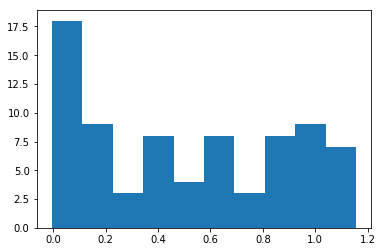

(array([ 1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0., 73.]),
 array([-19.52934284, -17.57640855, -15.62347427, -13.67053999,
        -11.7176057 ,  -9.76467142,  -7.81173714,  -5.85880285,
         -3.90586857,  -1.95293428,   0.        ]),
 <a list of 10 Patch objects>)

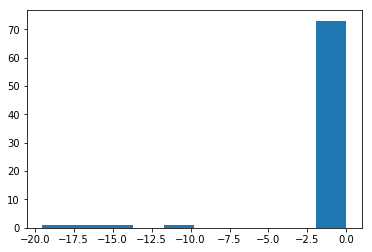

(array([58.,  8.,  2.,  1.,  2.,  2.,  2.,  1.,  0.,  1.]),
 array([-0.016949  ,  0.78944788,  1.59584476,  2.40224164,  3.20863852,
         4.0150354 ,  4.82143228,  5.62782915,  6.43422603,  7.24062291,
         8.04701979]),
 <a list of 10 Patch objects>)

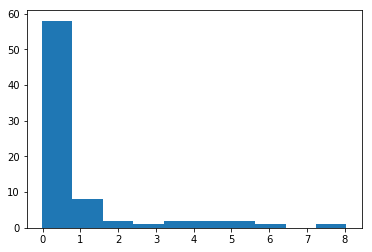

(array([28.,  0.,  0.,  2.,  4.,  8.,  5.,  3.,  7., 20.]),
 array([-4.15100000e-03,  3.37310621e+00,  6.75036341e+00,  1.01276206e+01,
         1.35048778e+01,  1.68821350e+01,  2.02593922e+01,  2.36366494e+01,
         2.70139066e+01,  3.03911638e+01,  3.37684211e+01]),
 <a list of 10 Patch objects>)

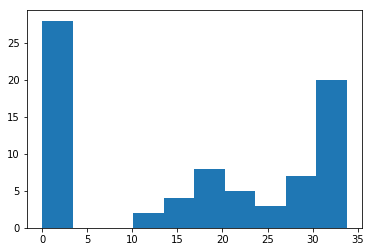

(array([ 5., 15.,  9., 12., 28.,  3.,  2.,  1.,  0.,  2.]),
 array([-0.14285714, -0.11133005, -0.07980296, -0.04827586, -0.01674877,
         0.01477833,  0.04630542,  0.07783251,  0.10935961,  0.1408867 ,
         0.17241379]),
 <a list of 10 Patch objects>)

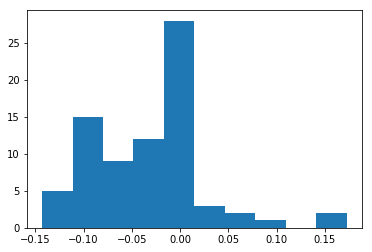

(array([28.,  4.,  9., 11.,  8.,  5.,  5.,  4.,  2.,  1.]),
 array([0.        , 0.17906977, 0.35813953, 0.5372093 , 0.71627907,
        0.89534884, 1.0744186 , 1.25348837, 1.43255814, 1.61162791,
        1.79069767]),
 <a list of 10 Patch objects>)

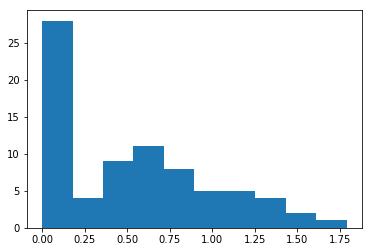

(array([69.,  4.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([-0.20930233,  3.27591115,  6.76112462, 10.24633809, 13.73155156,
        17.21676504, 20.70197851, 24.18719198, 27.67240545, 31.15761893,
        34.6428324 ]),
 <a list of 10 Patch objects>)

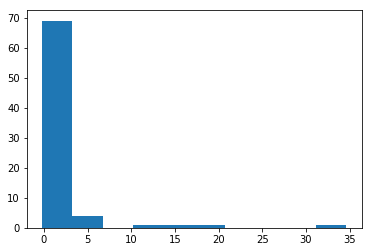

(array([ 1.,  1.,  0., 73.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([-17.999856  , -13.42844381,  -8.85703162,  -4.28561943,
          0.28579277,   4.85720496,   9.42861715,  14.00002934,
         18.57144153,  23.14285373,  27.71426592]),
 <a list of 10 Patch objects>)

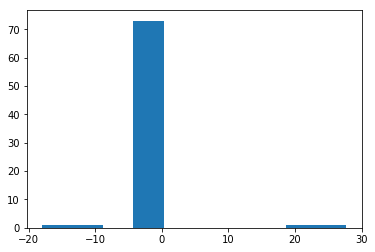

(array([22., 48.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.014085  ,  0.97327018,  1.96062537,  2.94798055,  3.93533574,
         4.92269092,  5.91004611,  6.89740129,  7.88475648,  8.87211166,
         9.85946685]),
 <a list of 10 Patch objects>)

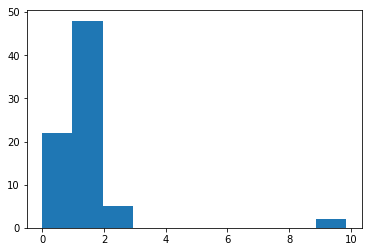

(array([28.,  0.,  2.,  7.,  7., 11.,  9.,  5.,  5.,  3.]),
 array([0.        , 0.62752294, 1.25504587, 1.88256881, 2.51009174,
        3.13761468, 3.76513761, 4.39266055, 5.02018349, 5.64770642,
        6.27522936]),
 <a list of 10 Patch objects>)

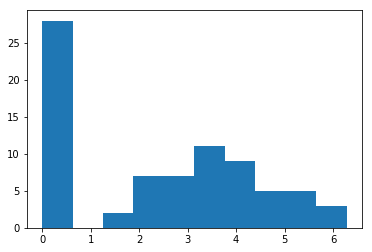

(array([14., 27., 23.,  7.,  0.,  2.,  1.,  2.,  0.,  1.]),
 array([-0.016393  ,  0.26711331,  0.55061961,  0.83412592,  1.11763222,
         1.40113853,  1.68464483,  1.96815114,  2.25165744,  2.53516375,
         2.81867005]),
 <a list of 10 Patch objects>)

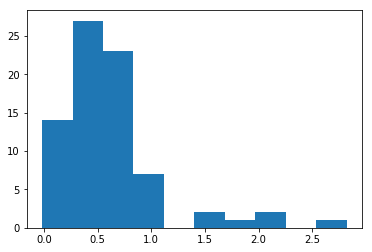

(array([52.,  7.,  7.,  4.,  0.,  1.,  1.,  1.,  1.,  3.]),
 array([-0.10144928,  0.17958173,  0.46061273,  0.74164374,  1.02267474,
         1.30370574,  1.58473675,  1.86576775,  2.14679875,  2.42782976,
         2.70886076]),
 <a list of 10 Patch objects>)

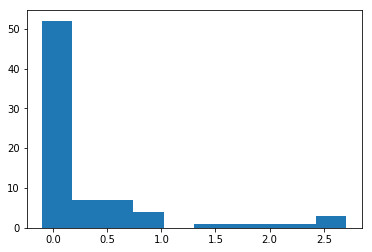

(array([ 6., 18.,  3.,  4.,  6.,  5.,  1.,  1., 31.,  2.]),
 array([-0.17391304, -0.15242338, -0.13093371, -0.10944405, -0.08795438,
        -0.06646472, -0.04497505, -0.02348539, -0.00199572,  0.01949394,
         0.04098361]),
 <a list of 10 Patch objects>)

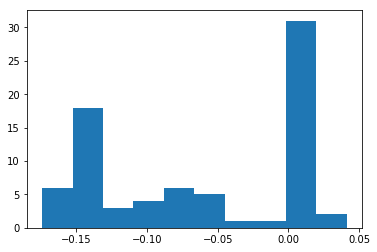

(array([28.,  0.,  6., 10., 10.,  7.,  9.,  2.,  4.,  1.]),
 array([ 0.        ,  1.03571429,  2.07142857,  3.10714286,  4.14285714,
         5.17857143,  6.21428571,  7.25      ,  8.28571429,  9.32142857,
        10.35714286]),
 <a list of 10 Patch objects>)

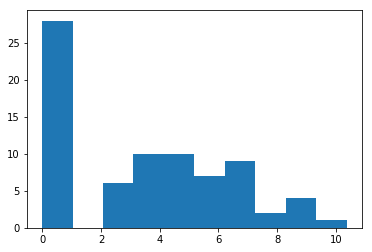

(array([ 2., 36., 11.,  0.,  0.,  0.,  0.,  0.,  0., 28.]),
 array([-0.20238095, -0.18214286, -0.16190476, -0.14166667, -0.12142857,
        -0.10119048, -0.08095238, -0.06071429, -0.04047619, -0.0202381 ,
         0.        ]),
 <a list of 10 Patch objects>)

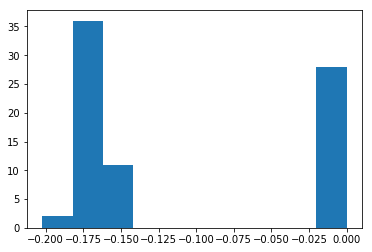

(array([ 4.,  1.,  6.,  6., 34.,  6.,  5.,  2.,  8.,  5.]),
 array([-0.20289855, -0.15418764, -0.10547674, -0.05676583, -0.00805492,
         0.04065599,  0.0893669 ,  0.1380778 ,  0.18678871,  0.23549962,
         0.28421053]),
 <a list of 10 Patch objects>)

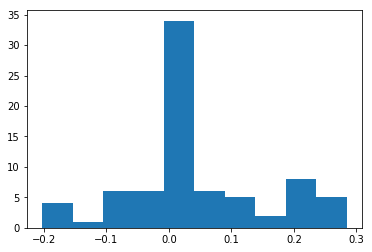

(array([20.,  8.,  0.,  4.,  9., 10.,  8.,  7.,  5.,  6.]),
 array([-1.05400000e-03,  9.52277206e-01,  1.90560841e+00,  2.85893962e+00,
         3.81227083e+00,  4.76560203e+00,  5.71893324e+00,  6.67226445e+00,
         7.62559565e+00,  8.57892686e+00,  9.53225806e+00]),
 <a list of 10 Patch objects>)

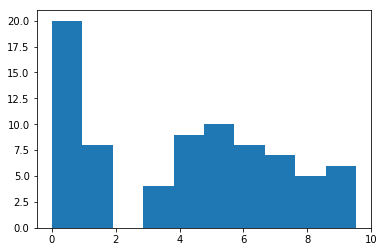

(array([47., 18.,  2.,  3.,  3.,  3.,  0.,  0.,  0.,  1.]),
 array([-0.033898  ,  0.69806453,  1.43002706,  2.16198959,  2.89395211,
         3.62591464,  4.35787717,  5.0898397 ,  5.82180223,  6.55376476,
         7.28572729]),
 <a list of 10 Patch objects>)

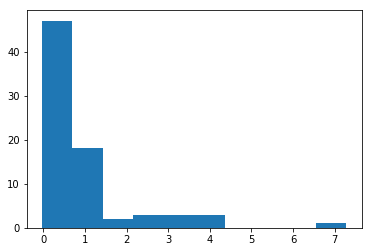

(array([18., 11., 11.,  5.,  0.,  0.,  0., 28.,  1.,  3.]),
 array([-0.17948718, -0.15648796, -0.13348873, -0.11048951, -0.08749029,
        -0.06449106, -0.04149184, -0.01849262,  0.0045066 ,  0.02750583,
         0.05050505]),
 <a list of 10 Patch objects>)

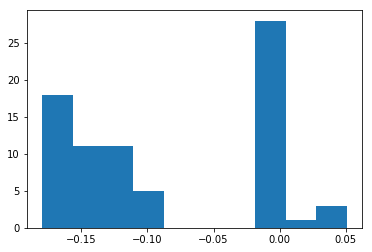

(array([31., 32.,  4.,  1.,  1.,  3.,  3.,  1.,  0.,  1.]),
 array([-8.13000000e-03,  1.13755479e+00,  2.28323959e+00,  3.42892438e+00,
         4.57460918e+00,  5.72029397e+00,  6.86597877e+00,  8.01166356e+00,
         9.15734836e+00,  1.03030332e+01,  1.14487179e+01]),
 <a list of 10 Patch objects>)

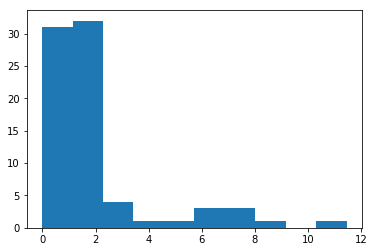

(array([22., 19.,  6.,  2.,  0.,  0.,  0.,  0.,  0., 28.]),
 array([-0.18 , -0.162, -0.144, -0.126, -0.108, -0.09 , -0.072, -0.054,
        -0.036, -0.018,  0.   ]),
 <a list of 10 Patch objects>)

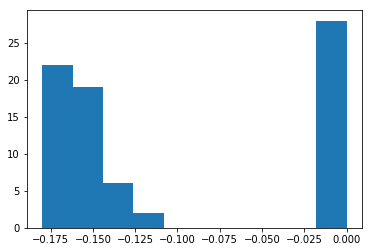

(array([28., 16., 15.,  3.,  8.,  5.,  0.,  0.,  0.,  2.]),
 array([0.        , 0.3994898 , 0.79897959, 1.19846939, 1.59795918,
        1.99744898, 2.39693878, 2.79642857, 3.19591837, 3.59540816,
        3.99489796]),
 <a list of 10 Patch objects>)

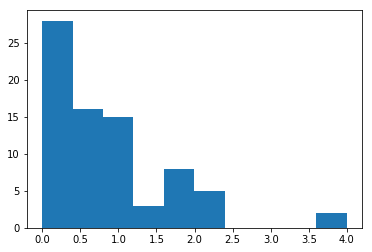

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 75.]),
 array([-19.52934284, -17.57640855, -15.62347427, -13.67053999,
        -11.7176057 ,  -9.76467142,  -7.81173714,  -5.85880285,
         -3.90586857,  -1.95293428,   0.        ]),
 <a list of 10 Patch objects>)

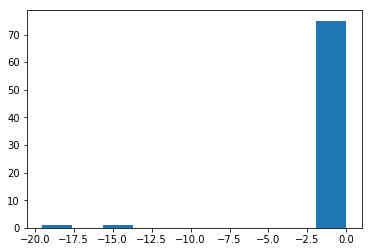

(array([20., 17., 12.,  0.,  0.,  0.,  0.,  0.,  0., 28.]),
 array([-0.18705036, -0.16834532, -0.14964029, -0.13093525, -0.11223022,
        -0.09352518, -0.07482014, -0.05611511, -0.03741007, -0.01870504,
         0.        ]),
 <a list of 10 Patch objects>)

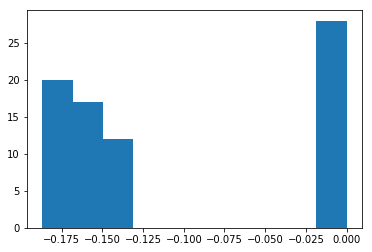

(array([28.,  0.,  1.,  9., 12., 14.,  7.,  5.,  0.,  1.]),
 array([0.        , 0.21607143, 0.43214286, 0.64821429, 0.86428571,
        1.08035714, 1.29642857, 1.5125    , 1.72857143, 1.94464286,
        2.16071429]),
 <a list of 10 Patch objects>)

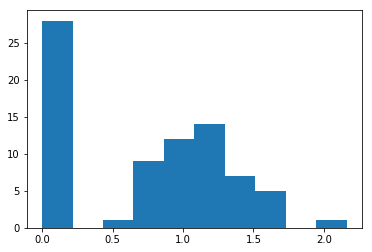

(array([14., 37.,  8.,  8.,  2.,  0.,  4.,  0.,  2.,  2.]),
 array([-0.11258278, -0.02410931,  0.06436415,  0.15283762,  0.24131109,
         0.32978456,  0.41825803,  0.50673149,  0.59520496,  0.68367843,
         0.7721519 ]),
 <a list of 10 Patch objects>)

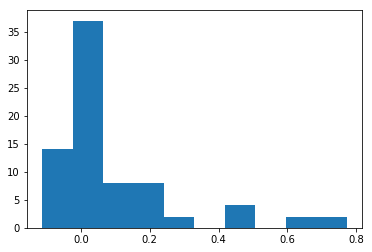

(array([67.,  2.,  3.,  3.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.13095238,  0.24213998,  0.61523234,  0.98832469,  1.36141705,
         1.73450941,  2.10760177,  2.48069413,  2.85378648,  3.22687884,
         3.5999712 ]),
 <a list of 10 Patch objects>)

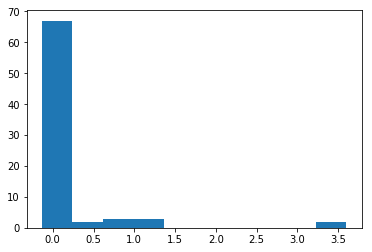

(array([14.,  9., 14., 12.,  7.,  7.,  7.,  0.,  3.,  4.]),
 array([-0.044747  ,  0.78228409,  1.60931518,  2.43634627,  3.26337736,
         4.09040845,  4.91743955,  5.74447064,  6.57150173,  7.39853282,
         8.22556391]),
 <a list of 10 Patch objects>)

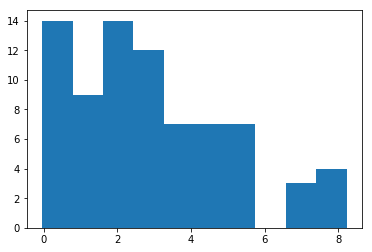

(array([64.,  3.,  4.,  0.,  3.,  1.,  0.,  1.,  0.,  1.]),
 array([-0.044444  ,  1.29714404,  2.63873207,  3.98032011,  5.32190815,
         6.66349619,  8.00508422,  9.34667226, 10.6882603 , 12.02984833,
        13.37143637]),
 <a list of 10 Patch objects>)

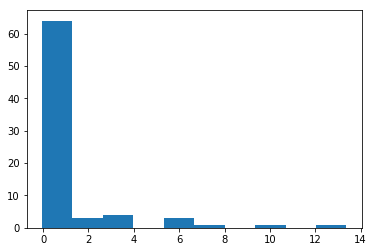

(array([ 7.,  4., 38.,  8.,  6., 10.,  0.,  1.,  1.,  2.]),
 array([-0.09345794, -0.05150345, -0.00954896,  0.03240553,  0.07436002,
         0.11631451,  0.158269  ,  0.20022349,  0.24217798,  0.28413247,
         0.32608696]),
 <a list of 10 Patch objects>)

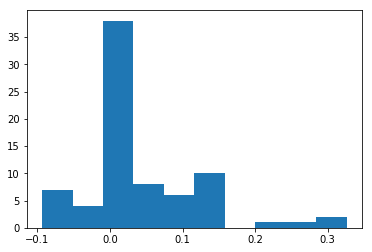

(array([28., 13., 12.,  8.,  7.,  5.,  1.,  1.,  0.,  2.]),
 array([0.        , 0.54642857, 1.09285714, 1.63928571, 2.18571429,
        2.73214286, 3.27857143, 3.825     , 4.37142857, 4.91785714,
        5.46428571]),
 <a list of 10 Patch objects>)

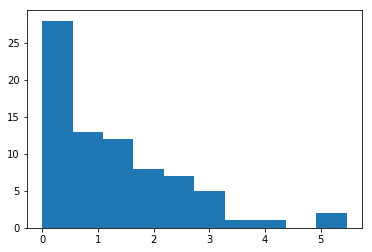

(array([13., 14., 11.,  7.,  2.,  2.,  0.,  0.,  0., 28.]),
 array([-0.15037594, -0.13533835, -0.12030075, -0.10526316, -0.09022556,
        -0.07518797, -0.06015038, -0.04511278, -0.03007519, -0.01503759,
         0.        ]),
 <a list of 10 Patch objects>)

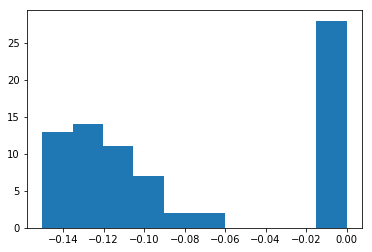

(array([28.,  4.,  7., 11., 12.,  5.,  0.,  4.,  3.,  3.]),
 array([0.        , 0.37658228, 0.75316456, 1.12974684, 1.50632911,
        1.88291139, 2.25949367, 2.63607595, 3.01265823, 3.38924051,
        3.76582278]),
 <a list of 10 Patch objects>)

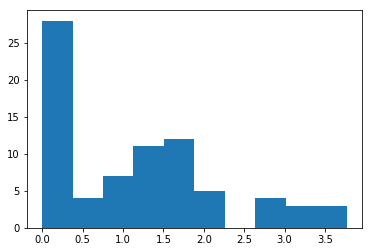

(array([ 3.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  0., 69.]),
 array([-19.52934284, -17.57640855, -15.62347427, -13.67053999,
        -11.7176057 ,  -9.76467142,  -7.81173714,  -5.85880285,
         -3.90586857,  -1.95293428,   0.        ]),
 <a list of 10 Patch objects>)

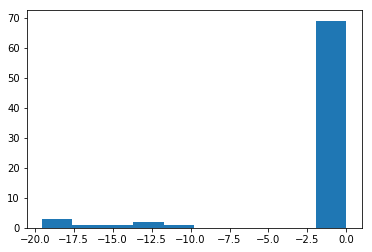

(array([13.,  8.,  9.,  7.,  5.,  4., 29.,  0.,  1.,  1.]),
 array([-0.13445378, -0.11455679, -0.0946598 , -0.07476281, -0.05486582,
        -0.03496883, -0.01507184,  0.00482516,  0.02472215,  0.04461914,
         0.06451613]),
 <a list of 10 Patch objects>)

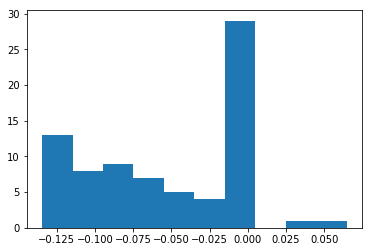

(array([28.,  0.,  0.,  5.,  9.,  8.,  7.,  6.,  7.,  7.]),
 array([ 0.        ,  9.5012987 , 19.0025974 , 28.5038961 , 38.00519481,
        47.50649351, 57.00779221, 66.50909091, 76.01038961, 85.51168831,
        95.01298701]),
 <a list of 10 Patch objects>)

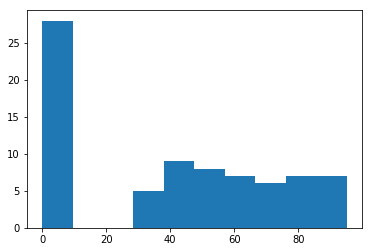

(array([17., 18.,  4.,  5.,  2.,  3.,  0.,  0.,  0., 28.]),
 array([-0.18918919, -0.17027027, -0.15135135, -0.13243243, -0.11351351,
        -0.09459459, -0.07567568, -0.05675676, -0.03783784, -0.01891892,
         0.        ]),
 <a list of 10 Patch objects>)

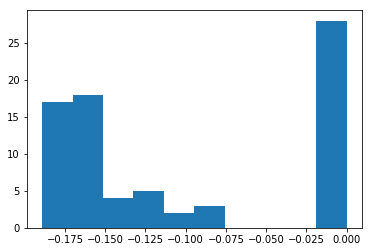

(array([20.,  8.,  0.,  0.,  1., 14., 18.,  7.,  5.,  4.]),
 array([-9.66200000e-03,  1.44760672e+00,  2.90487544e+00,  4.36214416e+00,
         5.81941288e+00,  7.27668161e+00,  8.73395033e+00,  1.01912190e+01,
         1.16484878e+01,  1.31057565e+01,  1.45630252e+01]),
 <a list of 10 Patch objects>)

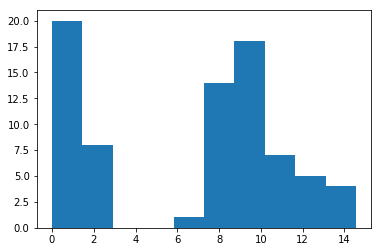

(array([28.,  0.,  9., 19.,  6.,  0.,  7.,  3.,  3.,  2.]),
 array([0.        , 0.26071429, 0.52142857, 0.78214286, 1.04285714,
        1.30357143, 1.56428571, 1.825     , 2.08571429, 2.34642857,
        2.60714286]),
 <a list of 10 Patch objects>)

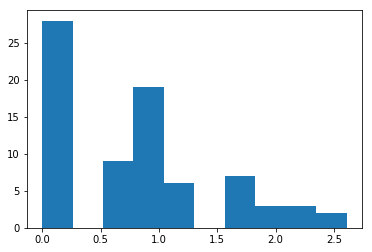

(array([14.,  0.,  2.,  5., 13., 11., 14., 10.,  6.,  2.]),
 array([-0.010101  ,  0.27180798,  0.55371695,  0.83562593,  1.11753491,
         1.39944388,  1.68135286,  1.96326183,  2.24517081,  2.52707979,
         2.80898876]),
 <a list of 10 Patch objects>)

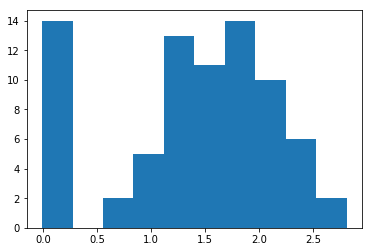

(array([75.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-3.12500000e-02,  3.82589010e+00,  7.68303021e+00,  1.15401703e+01,
         1.53973104e+01,  1.92544505e+01,  2.31115906e+01,  2.69687307e+01,
         3.08258708e+01,  3.46830109e+01,  3.85401510e+01]),
 <a list of 10 Patch objects>)

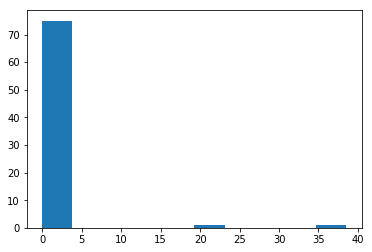

(array([67.,  1.,  1.,  1.,  1.,  1.,  0.,  3.,  0.,  2.]),
 array([-0.043478  ,  1.2355245 ,  2.51452699,  3.79352949,  5.07253198,
         6.35153448,  7.63053698,  8.90953947, 10.18854197, 11.46754447,
        12.74654696]),
 <a list of 10 Patch objects>)

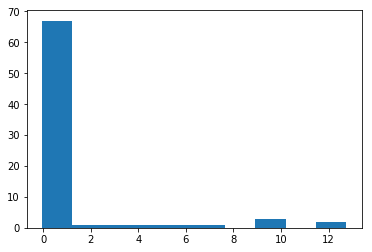

(array([72.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([-0.17171717,  1.79838883,  3.76849483,  5.73860083,  7.70870683,
         9.67881283, 11.64891883, 13.61902483, 15.58913084, 17.55923684,
        19.52934284]),
 <a list of 10 Patch objects>)

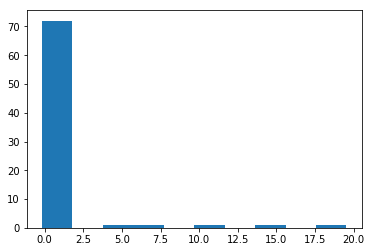

(array([63.,  3.,  4.,  1.,  2.,  2.,  1.,  0.,  0.,  1.]),
 array([-0.133333 ,  1.3799928,  2.8933186,  4.4066444,  5.9199702,
         7.433296 ,  8.9466218, 10.4599476, 11.9732734, 13.4865992,
        14.999925 ]),
 <a list of 10 Patch objects>)

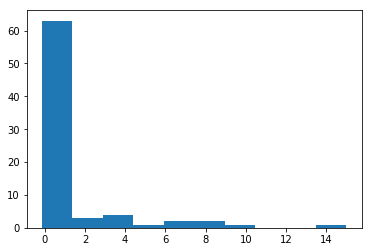

(array([63.,  3.,  1.,  4.,  3.,  0.,  0.,  2.,  0.,  1.]),
 array([-0.12295082,  2.31433133,  4.75161348,  7.18889563,  9.62617778,
        12.06345992, 14.50074207, 16.93802422, 19.37530637, 21.81258852,
        24.24987067]),
 <a list of 10 Patch objects>)

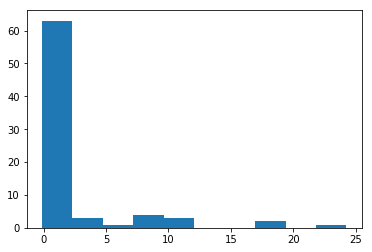

(array([ 1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0., 73.]),
 array([-21.000021 , -18.9000189, -16.8000168, -14.7000147, -12.6000126,
        -10.5000105,  -8.4000084,  -6.3000063,  -4.2000042,  -2.1000021,
          0.       ]),
 <a list of 10 Patch objects>)

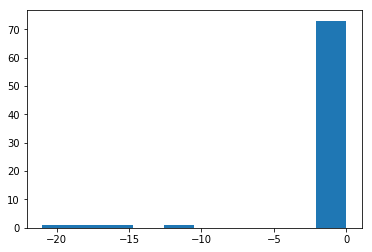

(array([38., 17., 13.,  2.,  2.,  1.,  3.,  0.,  0.,  1.]),
 array([0.        , 0.20595238, 0.41190476, 0.61785714, 0.82380952,
        1.0297619 , 1.23571429, 1.44166667, 1.64761905, 1.85357143,
        2.05952381]),
 <a list of 10 Patch objects>)

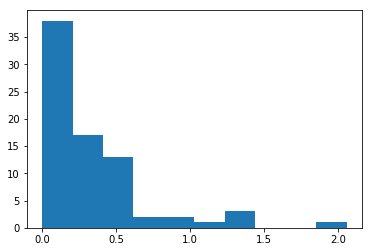

(array([17., 25., 20., 12.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([-0.007463  ,  0.36241612,  0.73229524,  1.10217436,  1.47205348,
         1.8419326 ,  2.21181172,  2.58169084,  2.95156996,  3.32144908,
         3.6913282 ]),
 <a list of 10 Patch objects>)

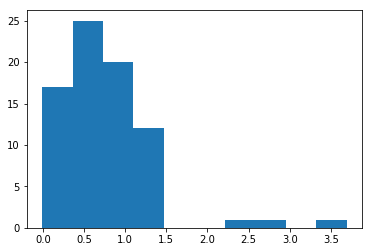

(array([24.,  7., 11.,  7.,  5.,  6.,  7.,  1.,  6.,  3.]),
 array([-0.12790698,  0.06975767,  0.26742232,  0.46508697,  0.66275161,
         0.86041626,  1.05808091,  1.25574555,  1.4534102 ,  1.65107485,
         1.8487395 ]),
 <a list of 10 Patch objects>)

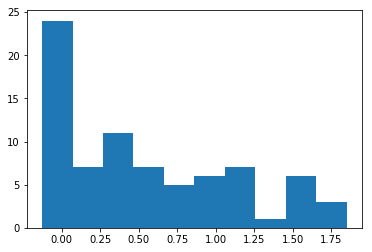

(array([70.,  1.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-0.25      ,  1.18023647,  2.61047295,  4.04070942,  5.47094589,
         6.90118237,  8.33141884,  9.76165531, 11.19189179, 12.62212826,
        14.05236473]),
 <a list of 10 Patch objects>)

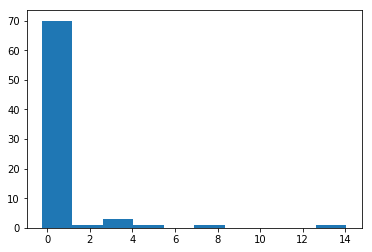

(array([56.,  2.,  0., 12.,  2.,  2.,  0.,  2.,  0.,  1.]),
 array([-0.105263  ,  0.34736834,  0.79999968,  1.25263103,  1.70526237,
         2.15789371,  2.61052505,  3.06315639,  3.51578774,  3.96841908,
         4.42105042]),
 <a list of 10 Patch objects>)

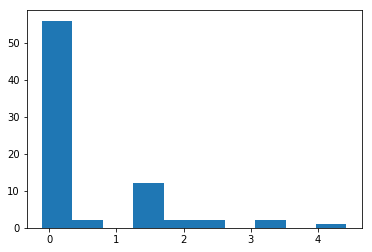

(array([28.,  1.,  4.,  6.,  8., 10.,  5.,  8.,  4.,  3.]),
 array([0.        , 0.06904762, 0.13809524, 0.20714286, 0.27619048,
        0.3452381 , 0.41428571, 0.48333333, 0.55238095, 0.62142857,
        0.69047619]),
 <a list of 10 Patch objects>)

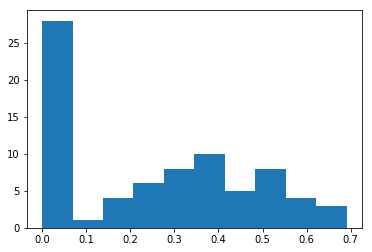

(array([ 4., 65.,  4.,  0.,  1.,  1.,  0.,  1.,  0.,  1.]),
 array([-19.52934284,  -7.07639805,   5.37654673,  17.82949151,
         30.2824363 ,  42.73538108,  55.18832587,  67.64127065,
         80.09421543,  92.54716022, 105.000105  ]),
 <a list of 10 Patch objects>)

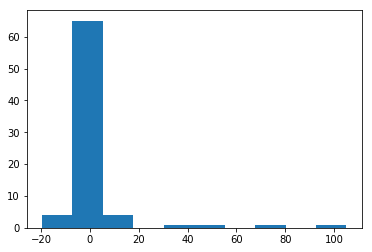

(array([12., 40.,  6.,  6.,  4.,  3.,  1.,  0.,  1.,  4.]),
 array([-0.09243697, -0.0428263 ,  0.00678437,  0.05639504,  0.10600571,
         0.15561637,  0.20522704,  0.25483771,  0.30444838,  0.35405905,
         0.40366972]),
 <a list of 10 Patch objects>)

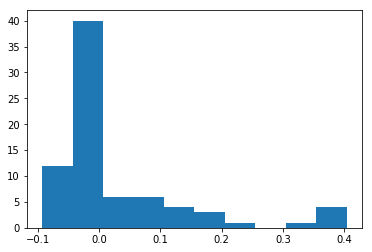

(array([ 3.,  3.,  0.,  0., 65.,  2.,  0.,  1.,  2.,  1.]),
 array([-19.52934284, -15.47640645, -11.42347007,  -7.37053369,
         -3.3175973 ,   0.73533908,   4.78827546,   8.84121185,
         12.89414823,  16.94708462,  21.000021  ]),
 <a list of 10 Patch objects>)

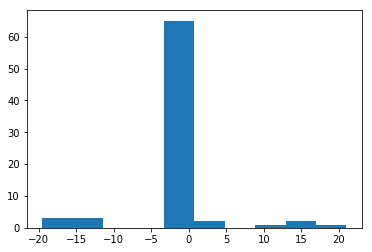

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  2., 38., 35.]),
 array([-19.52934284, -17.11982961, -14.71031638, -12.30080314,
         -9.89128991,  -7.48177668,  -5.07226345,  -2.66275022,
         -0.25323699,   2.15627624,   4.56578947]),
 <a list of 10 Patch objects>)

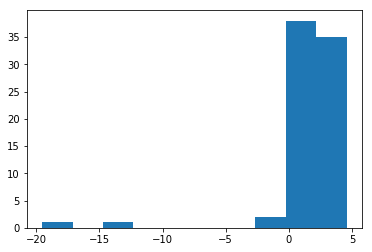

(array([29., 11., 18., 12.,  1.,  0.,  0.,  0.,  2.,  4.]),
 array([-0.009524  ,  0.55372348,  1.11697096,  1.68021845,  2.24346593,
         2.80671341,  3.36996089,  3.93320837,  4.49645586,  5.05970334,
         5.62295082]),
 <a list of 10 Patch objects>)

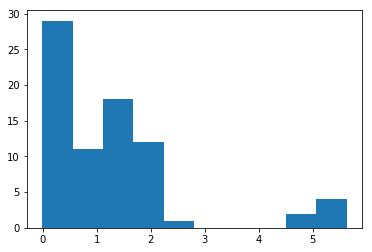

(array([14.,  9.,  5.,  0.,  5.,  7., 11., 16.,  5.,  5.]),
 array([-0.00641   ,  0.40245018,  0.81131036,  1.22017053,  1.62903071,
         2.03789089,  2.44675107,  2.85561125,  3.26447142,  3.6733316 ,
         4.08219178]),
 <a list of 10 Patch objects>)

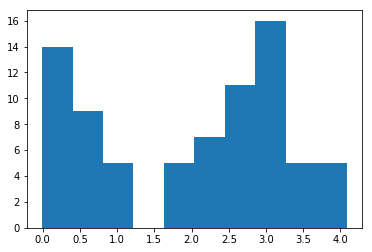

(array([28.,  0.,  4., 10.,  7., 11.,  9.,  3.,  2.,  3.]),
 array([0.        , 0.48348624, 0.96697248, 1.45045872, 1.93394495,
        2.41743119, 2.90091743, 3.38440367, 3.86788991, 4.35137615,
        4.83486239]),
 <a list of 10 Patch objects>)

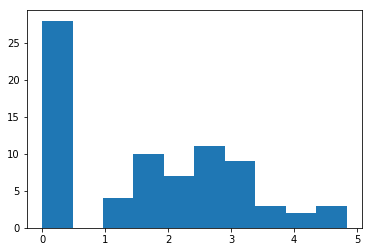

In [10]:
# Using RobustScaler()
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape
X_test.shape
for i in range(77): 
    plt.hist(X_train[i])
    plt.show();
    
import warnings
warnings.filterwarnings("ignore")

#  I. Regression Task.

### 1. Applying two models with bagging and any two models with pasting.


#### <b> First working on just the estimators and tuning parameters for 2 models

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

<b>MODEL 1:  Linear Regression

- No parameter tuning required

 <b>MODEL 2:  Ridge Regression

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid = {'alpha':[0.01, 1, 5, 10, 100, 1000]}
grid_search = GridSearchCV(ridge, param_grid, cv = 5)

grid_search.fit(X_train, y_train)

print(' \n Best parameter: {}'.format(grid_search.best_params_))
print('Best Score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 1, 5, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

 
 Best parameter: {'alpha': 100}
Best Score: 0.9098794081944418


In [23]:
param_grid = {'alpha':[100,300,500,700,900]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best Score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [100, 300, 500, 700, 900]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameters: {'alpha': 300}
Best Score: 0.9100904553962483


In [24]:
param_grid = {'alpha':[350,400,450]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best Score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [350, 400, 450]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

Best parameters: {'alpha': 350}
Best Score: 0.9100196347789833


<b> Ridge model with best parameter (alpha = 350)

In [25]:
#Model with the best parameter
ridge=Ridge(alpha=350)
ridge.fit(X_train,y_train)
print('R-squared score (training set): {:.3f}'
       .format(ridge.score(X_train, y_train)))
print('\n')

print('R-squared score (test set): {:.3f}'
       .format(ridge.score(X_test,y_test)))

Ridge(alpha=350, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

R-squared score (training set): 0.954


R-squared score (test set): 0.946


### <b>1 A. Applying Bagging to Linear Regression and Ridge

1) Linear Regression

In [32]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
param_grid = {
    'n_estimators': [10,  50, 100],
    'max_samples' : [1,10,50, 500],
    'max_features': [1,50,77],
    'bootstrap': [True],
    'n_jobs': [-1]
             }
grid_search = GridSearchCV(BaggingRegressor(LinearRegression()),param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print('\n')
print('Best parameters: {}'.format(grid_search.best_params_))
print('\n')
print('Best Score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100], 'max_samples': [1, 10, 50, 500], 'max_features': [1, 50, 77], 'bootstrap': [True], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)



Best parameters: {'bootstrap': True, 'max_features': 77, 'max_samples': 500, 'n_estimators': 10, 'n_jobs': -1}


Best Score: 0.9322559847397498


####  Cross validation score and accuracy for Linear Regression
Using best parameters for BaggingRegressor :
Best parameters: {'bootstrap': True, 'max_features': 77, 'max_samples': 500, 'n_estimators': 10, 'n_jobs': -1}

In [32]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
reg_bag = BaggingRegressor(LinearRegression(), bootstrap = True, max_features = 77, max_samples = 500, n_estimators = 10, n_jobs =-1, random_state=10)
scores = cross_val_score(reg_bag, X_train, y_train, cv=5)
predictions = cross_val_predict(reg_bag, X_test, y_test, cv=5)
accuracy = metrics.r2_score(y_test, predictions)

print("Cross validation scores for Linear Regression with Bagging: {}".format(scores))
print('\n')
print("Average Cross validation scores for Linear Regression with Bagging: {}".format(scores.mean()))
print('\n')
print("Cross-Predicted Accuracy for Linear Regression with Bagging:"+ str(accuracy))

Cross validation scores for Linear Regression with Bagging: [0.94187035 0.95599363 0.93515886 0.94606181 0.74418542]


Average Cross validation scores for Linear Regression with Bagging: 0.9046540126740144


Cross-Predicted Accuracy for Linear Regression with Bagging:0.9351876693830427


2) Ridge

In [35]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=350)
param_grid = {
    'n_estimators': [10,  50, 100],
    'max_samples' : [1,10,50, 500],
    'max_features': [1,50,77],
    'bootstrap': [True],
    'n_jobs': [-1]
             }
grid_search = GridSearchCV(BaggingRegressor(ridge),param_grid=param_grid,cv=3)
grid_search.fit(X_train, y_train)
print('\n')
print('Best parameters: {}'.format(grid_search.best_params_))
print('\n')
print('Best Score: {}'.format(grid_search.best_score_))                           

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=Ridge(alpha=350, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100], 'max_samples': [1, 10, 50, 500], 'max_features': [1, 50, 77], 'bootstrap': [True], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)



Best parameters: {'bootstrap': True, 'max_features': 50, 'max_samples': 500, 'n_estimators': 10, 'n_jobs': -1}


Best Score: 0.9057041691562332


####  Cross validation score and accuracy for Ridge
Using best parameters for BaggingRegressor :
Best parameters: {'bootstrap': True, 'max_features': 77, 'max_samples': 500, 'n_estimators': 10, 'n_jobs': -1}

In [36]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
ridge_bag = BaggingRegressor(ridge, bootstrap = True, max_features = 77, max_samples = 500, n_estimators = 10, n_jobs =-1, random_state=10)
scores = cross_val_score(ridge_bag, X_train, y_train, cv= 5)
predictions = cross_val_predict(ridge_bag, X_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)

print("Cross validation scores for Ridge with Bagging: {}".format(scores))
print('\n')
print("Average Cross validation scores for Ridge Regression with Bagging: {}".format(scores.mean()))
print('\n')
print("Cross-Predicted Accuracy for Linear Ridge with Bagging:"+ str(accuracy))

Cross validation scores for Ridge with Bagging: [0.94310163 0.9507579  0.93594015 0.92877539 0.76614883]


Average Cross validation scores for Ridge Regression with Bagging: 0.9049447787870145


Cross-Predicted Accuracy for Linear Ridge with Bagging:0.9311554955331371


### <b>1 B. Applying Pasting to Linear Regression and Ridge

1. Linear Regression

In [21]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
param_grid = {
    'n_estimators': [10,  50, 100],
    'max_samples' : [1,10,50, 500],
    'max_features': [1,50,77],
    'bootstrap': [False],
    'n_jobs': [-1]
             }
grid_search = GridSearchCV(BaggingRegressor(LinearRegression()),param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
print('\n')
print('Best parameters: {}'.format(grid_search.best_params_))
print('\n')
print('Best Score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100], 'max_samples': [1, 10, 50, 500], 'max_features': [1, 50, 77], 'bootstrap': [False], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)



Best parameters: {'bootstrap': False, 'max_features': 77, 'max_samples': 500, 'n_estimators': 10, 'n_jobs': -1}


Best Score: 0.926148875131428


#### Cross validation score and accuracy for Linear Regression
 Best parameters: {'bootstrap': True, 'max_features': 77, 'max_samples': 500, 'n_estimators': 10, 'n_jobs': -1}

In [23]:
#update the parameters from above
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
reg_pas = BaggingRegressor(LinearRegression(), bootstrap = False, max_features = 77, max_samples = 500, n_estimators = 10, n_jobs =-1)
scores = cross_val_score(reg_pas, X_train, y_train, cv=5)
predictions = cross_val_predict(reg_pas, X_test, y_test, cv=5)
accuracy = metrics.r2_score(y_test, predictions)

print("Cross validation scores for Linear Regression with Pasting: {}".format(scores))
print('\n')
print("Average Cross validation scores for Linear Regression with Pasting: {}".format(scores.mean()))
print('\n')
print("Cross-Predicted Accuracy for Linear Regression with Pasting:"+ str(accuracy))

Cross validation scores for Linear Regression with Pasting: [0.94662263 0.944473   0.93945062 0.93541193 0.77507606]


Average Cross validation scores for Linear Regression with Pasting: 0.9082068487922417


Cross-Predicted Accuracy for Linear Regression with Pasting:0.9449114581668125


2. Ridge

In [22]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=350)
param_grid = {
    'n_estimators': [10,  50, 100],
    'max_samples' : [1,10,50, 500],
    'max_features': [1,50,77],
    'bootstrap': [False],
    'n_jobs': [-1]
             }
grid_search = GridSearchCV(BaggingRegressor(ridge),param_grid=param_grid,cv=3)
grid_search.fit(X_train, y_train)
print('\n')
print('Best parameters: {}'.format(grid_search.best_params_))
print('\n')
print('Best Score: {}'.format(grid_search.best_score_))  

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=Ridge(alpha=350, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100], 'max_samples': [1, 10, 50, 500], 'max_features': [1, 50, 77], 'bootstrap': [False], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)



Best parameters: {'bootstrap': False, 'max_features': 77, 'max_samples': 500, 'n_estimators': 100, 'n_jobs': -1}


Best Score: 0.9034104797419822


#### Cross validation score and accuracy for Ridge
Best parameters: {'bootstrap': False, 'max_features': 77, 'max_samples': 500, 'n_estimators': 100, 'n_jobs': -1}

In [24]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
ridge_bag = BaggingRegressor(ridge, bootstrap = False, max_features = 77, max_samples = 500, n_estimators = 100, n_jobs =-1, random_state=10)
scores = cross_val_score(ridge_bag, X_train, y_train, cv= 5)
predictions = cross_val_predict(ridge_bag, X_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)

print("Cross validation scores for Ridge with Pasting: {}".format(scores))
print('\n')
print("Average Cross validation scores for Ridge Regression with Pasting: {}".format(scores.mean()))
print('\n')
print("Cross-Predicted Accuracy for Linear Ridge with Pasting:"+ str(accuracy))

Cross validation scores for Ridge with Pasting: [0.94297917 0.9484889  0.93421908 0.93012094 0.76129728]


Average Cross validation scores for Ridge Regression with Pasting: 0.9034210730215626


Cross-Predicted Accuracy for Linear Ridge with Pasting:0.9425197884859566


<b>Performing Bagging with default hyper parameters and base models 

In [35]:
#############LINEAR REGRESSION#########################
#Bagging with no hyper-param tuning Linear Regression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
reg_bag = BaggingRegressor(LinearRegression(), bootstrap = True, random_state=10)
scores = cross_val_score(reg_bag, X_train, y_train, cv=5)
predictions = cross_val_predict(reg_bag, X_test, y_test, cv=5)
accuracy = metrics.r2_score(y_test, predictions)

print("Cross validation scores for Linear Regression with Bagging: {}".format(scores))
print('\n')
print("Average Cross validation scores for Linear Regression with Bagging: {}".format(scores.mean()))
print('\n')
print("Cross-Predicted Accuracy for Linear Regression with Bagging:"+ str(accuracy))

Cross validation scores for Linear Regression with Bagging: [0.96234045 0.95279274 0.92319544 0.93757161 0.7886314 ]


Average Cross validation scores for Linear Regression with Bagging: 0.9129063269174411


Cross-Predicted Accuracy for Linear Regression with Bagging:0.9497811330393321


In [36]:
#############RIDGE REGRESSION#########################
#Bagging with no hyper-param tuning
ridge_bag = BaggingRegressor(Ridge(), bootstrap = True,random_state=10)
scores = cross_val_score(ridge_bag, X_train, y_train, cv= 5)
predictions = cross_val_predict(ridge_bag, X_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)

print("Cross validation scores for Ridge with Bagging: {}".format(scores))
print('\n')
print("Average Cross validation scores for Ridge Regression with Bagging: {}".format(scores.mean()))
print('\n')
print("Cross-Predicted Accuracy for Linear Ridge with Bagging:"+ str(accuracy))

Cross validation scores for Ridge with Bagging: [0.96236376 0.95267745 0.92342681 0.93767444 0.78786824]


Average Cross validation scores for Ridge Regression with Bagging: 0.9128021404238179


Cross-Predicted Accuracy for Linear Ridge with Bagging:0.9498020403653882


In [37]:
#Pasting with no hyper-param tuning Linear Regression
reg_pas = BaggingRegressor(LinearRegression(), bootstrap = False)
scores = cross_val_score(reg_pas, X_train, y_train, cv=5)
predictions = cross_val_predict(reg_pas, X_test, y_test, cv=5)
accuracy = metrics.r2_score(y_test, predictions)

print("Cross validation scores for Linear Regression with Pasting: {}".format(scores))
print('\n')
print("Average Cross validation scores for Linear Regression with Pasting: {}".format(scores.mean()))
print('\n')
print("Cross-Predicted Accuracy for Linear Regression with Pasting:"+ str(accuracy))

Cross validation scores for Linear Regression with Pasting: [0.96053169 0.94966145 0.92167429 0.92787337 0.77850685]


Average Cross validation scores for Linear Regression with Pasting: 0.9076495287010644


Cross-Predicted Accuracy for Linear Regression with Pasting:0.9486644585578861


In [38]:
#Pasting with no hyper-param tuning RIDGE
ridge_bag = BaggingRegressor(ridge, bootstrap = False, random_state=10)
scores = cross_val_score(ridge_bag, X_train, y_train, cv= 5)
predictions = cross_val_predict(ridge_bag, X_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)

print("Cross validation scores for Ridge with Pasting: {}".format(scores))
print('\n')
print("Average Cross validation scores for Ridge Regression with Pasting: {}".format(scores.mean()))
print('\n')
print("Cross-Predicted Accuracy for Linear Ridge with Pasting:"+ str(accuracy))

Cross validation scores for Ridge with Pasting: [0.96078772 0.95117675 0.9373669  0.92812864 0.77262639]


Average Cross validation scores for Ridge Regression with Pasting: 0.9100172822465398


Cross-Predicted Accuracy for Linear Ridge with Pasting:0.9506585218108712


# <center>  Summary Of Scores for Bagging and Pasting
\begin{array}{rr} \hline 
Models  &CV-score &Cross-Predicted Accuracy   \\ \hline
Linear Reg &0.907649528701063 &0.9486644585578857   \\ \hline
Ridge  &0.9100172822465638 &0.9506585218108778 \\ \hline
Linear Reg (Bagging) &0.9046540126740144 &0.9351876693830427   \\ \hline
Ridge (Bagging) &0.9049447787870145 &0.9311554955331371  \\ \hline
Linear Reg (Pasting) &0.9082068487922417 &0.9449114581668125  \\ \hline
Ridge (Pasting) &0.9034210730215626 &0.9425197884859566   \\ \hline
\end{array}

As we can see from the scores above bagging has brought down the average cv-score as well as the cross-predicted accuracy for both the models. This tells us that our ensemble methods perform worse than our original models.This is quite shocking but not impossible. Better performance of Bagging/pasting is not gauranteed.However, If I were to perform bagging without any hyperparamatere tuning (or default hyperparamaters), the models perform better in both cases for Linear Regression. I feel the reason for this behaviour is the fact that there is too much variability in our the samples (even after scaling!) taken for ensembles which is bringing down the performance of ensembles collectively. Maybe performing these after min-max scaling would've yielded coherent results.

# <center>  Summary Of Scores for Bagging and Pasting
\begin{array}{rr} \hline 
Models  &CV-score &Cross-Predicted Accuracy   \\ \hline
Linear Reg &0.907649528701063 &0.9486644585578857   \\ \hline
Ridge  &0.9100172822465638 &0.9506585218108778 \\ \hline
Linear Reg (Bagging, no tuning) &0.9129063269174411 &0.9497811330393321 \\ \hline
Ridge (Bagging, no tuning) &0.9128021404238179 &0.9498020403653882\\ \hline
Linear Reg (Pasting, no tuning) &0.9076495287010644 &0.9486644585578861\\ \hline
Ridge (Pasting, no tuning) &0.9100172822465398 &0.9506585218108712   \\ \hline
\end{array}

### 2. Applying two models with AdaBoost

 1) Linear Regression

In [39]:
# grid search for Adaboost parameters
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
linear = LinearRegression()

param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }
grid_search = GridSearchCV(AdaBoostRegressor(linear),  param_grid = param_dist, cv=3)

grid_search.fit(X_train, y_train)
print(' \n Best parameter: {}'.format(grid_search.best_params_))
print('Best Score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

 
 Best parameter: {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 50}
Best Score: 0.9182508154725036


In [62]:
abr = AdaBoostRegressor(LinearRegression(),learning_rate = 0.01, loss = 'square', n_estimators = 50, random_state=10)
scores = cross_val_score(abr, X_train, y_train, cv= 5)
predictions = cross_val_predict(abr, X_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)

print("Cross validation scores for AdaBosst Regressor with Linear Regression as base model: {}".format(scores))
print('\n')
print("Average Cross validation scores for AdaBosst Regressor with Linear Regression as base model: {}".format(scores.mean()))
print('\n')
print("Cross-Predicted Accuracy for for AdaBosst Regressor with Linear Regression as base model"+ str(accuracy))

Cross validation scores for AdaBosst Regressor with Linear Regression as base model: [0.96136988 0.9502772  0.92187351 0.92959705 0.76848025]


Average Cross validation scores for AdaBosst Regressor with Linear Regression as base model: 0.9063195816013643


Cross-Predicted Accuracy for for AdaBosst Regressor with Linear Regression as base model0.9339731472421582


 2) Ridge Regression

In [40]:
ridge = Ridge(alpha=350)
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }
grid_search = GridSearchCV(AdaBoostRegressor(ridge),  param_grid = param_dist, cv=3)

grid_search.fit(X_train, y_train)
print(' \n Best parameter: {}'.format(grid_search.best_params_))
print('Best Score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=Ridge(alpha=350, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

 
 Best parameter: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50}
Best Score: 0.9198124066563512


In [63]:
abr = AdaBoostRegressor(ridge,learning_rate = 0.01, loss = 'linear', n_estimators = 50, random_state=10)
scores = cross_val_score(abr, X_train, y_train, cv= 5)
predictions = cross_val_predict(abr, X_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)

print("Cross validation scores for AdaBosst Regressor with Ridge Regression as base model: {}".format(scores))
print('\n')
print("Average Cross validation scores for AdaBoost Regressor with Ridge Regression as base model: {}".format(scores.mean()))
print('\n')
print("Cross-Predicted Accuracy for for AdaBoost Regressor with Ridge Regression as base model"+ str(accuracy))

Cross validation scores for AdaBosst Regressor with Ridge Regression as base model: [0.96200186 0.95151281 0.93832638 0.92725728 0.76370252]


Average Cross validation scores for AdaBosst Regressor with Ridge Regression as base model: 0.9085601714419742


Cross-Predicted Accuracy for for AdaBosst Regressor with Ridge Regression as base model0.9458917855710016


Observing a similar result as is the case for earlier used ensemble methods

### 3. Applying one model with Gradient Boosting Regressor

In [30]:
from  sklearn.ensemble import GradientBoostingRegressor
param_dist = {
 'max_depth': [1,2,4,5],
 'n_estimators': [3,50, 77],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
 }

pre_gs_inst = GridSearchCV(GradientBoostingRegressor(), param_grid = param_dist,cv=3)

pre_gs_inst.fit(X_train, y_train)
print('\n')
print('Best parameters: {}'.format(pre_gs_inst.best_params_))
print('\n')
print('Best Score: {}'.format(pre_gs_inst.best_score_))  


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 4, 5], 'n_estimators': [3, 50, 77], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)



Best parameters: {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 50}


Best Score: 0.9235899542695871


#### Cross validation score and accuracy for GBR
 Best parameters: {'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 50}

In [41]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
gbr = GradientBoostingRegressor(learning_rate = 0.3, max_depth = 2, n_estimators = 50, random_state=10)
scores = cross_val_score(gbr, X_train, y_train, cv= 5)
predictions = cross_val_predict(gbr, X_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)

print("Cross validation scores for Gradient Boosting Regressor: {}".format(scores))
print('\n')
print("Average Cross validation scores for Gradient Boosting Regressor: {}".format(scores.mean()))
print('\n')
print("Cross-Predicted Accuracy for Gradient Boosting Regressor:"+ str(accuracy))


Cross validation scores for Gradient Boosting Regressor: [0.9509878  0.93035545 0.92062713 0.92174201 0.85676542]


Average Cross validation scores for Gradient Boosting Regressor: 0.916095562557435


Cross-Predicted Accuracy for Gradient Boosting Regressor:0.9304965609131991


In [100]:
gbr.fit(X_train,y_train)
importances = gbr.feature_importances_[:10]
std = np.std([gbr.feature_importances_ for tree in gbr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:10]
# Print the feature ranking
print("Feature ranking:")

for f in range(0,8):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]));


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=10, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Feature ranking:
1. feature 6 (0.474243)
2. feature 5 (0.040593)
3. feature 0 (0.008956)
4. feature 4 (0.007903)
5. feature 8 (0.001595)
6. feature 9 (0.001318)
7. feature 1 (0.001150)
8. feature 7 (0.000907)


In [59]:
#BASE DECISION TREE REGRESSOR SCORES
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X_train, y_train)
scores = cross_val_score(tree_reg1, X_train, y_train, cv= 5)
predictions = cross_val_predict(tree_reg1, X_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)

print("Cross validation scores for Decision Tree Regressor: {}".format(scores))
print('\n')
print("Average Cross validation scores for Decision Tree Regressor: {}".format(scores.mean()))
print('\n')
print("Cross-Predicted Accuracy for Decision Tree Regressor:"+ str(accuracy))


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Cross validation scores for Decision Tree Regressor: [0.80233889 0.77246736 0.73458553 0.74271857 0.78982921]


Average Cross validation scores for Decision Tree Regressor: 0.7683879106782212


Cross-Predicted Accuracy for Decision Tree Regressor:0.7659955225143854


In [98]:
importances = tree_reg1.feature_importances_[:10]
std = np.std([tree_reg1.feature_importances_ for tree in gbr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:10]

# Print the feature ranking
print("Feature ranking:")

for f in range(0,8):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]));


Feature ranking:
1. feature 6 (1.000000)
2. feature 9 (0.000000)
3. feature 8 (0.000000)
4. feature 7 (0.000000)
5. feature 5 (0.000000)
6. feature 4 (0.000000)
7. feature 3 (0.000000)
8. feature 2 (0.000000)


We can see that in the case of Gradient Boosting, the improvement over the base model (Decision Tree Regression) is immense. We can also note that the top two important features remain the same in both cases. However, in the case of Decision Tree Regression, the only importance given to is feature 6.

# <center>  Summary Of Scores for Bagging and Pasting
\begin{array}{rr} \hline 
Models  &CV-score &Cross-Predicted Accuracy   \\ \hline
Linear Reg &0.907649528701063 &0.9486644585578857   \\ \hline
Ridge  &0.9100172822465638 &0.9506585218108778 \\ \hline
Linear Reg (Bagging) &0.9046540126740144 &0.9351876693830427   \\ \hline
Ridge (Bagging) &0.9049447787870145 &0.9311554955331371  \\ \hline
Linear Reg (Pasting) &0.9082068487922417 &0.9449114581668125  \\ \hline
Ridge (Pasting) &0.9034210730215626 &0.9425197884859566   \\ \hline
Linear (Adaboost) &0.9063195816013643 &0.9339731472421582  \\ \hline
Ridge (Adaboost) &0.9085601714419742 &0.9458917855710016  \\ \hline
Decision Tree Reg &0.7683879106782212 &0.7659955225143854  \\ \hline
Gradient Boost &0.916095562557435 &0.9304965609131991  \\ \hline
\end{array}

# 4. Applying PCA on data and then apply all the models in project 2 

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_data_train = StandardScaler().fit_transform(X_train)
X_data_test = StandardScaler().fit_transform(X_test)

c:\users\mxb172830\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\mxb172830\appdata\local\programs\python\python35\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\mxb172830\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\mxb172830\appdata\local\programs\python\python35\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).t

I have taken principal components that explain 98% of the variability in our dataset.

In [11]:
pca = PCA(n_components=0.98, whiten=True)
pca_X_train = pca.fit_transform(X_data_train)
pca_X_test = pca.fit_transform(X_data_test)

In [12]:
print('Original number of features:', X_train.shape[1])
print('Reduced number of features:', pca_X_train.shape[1])

Original number of features: 77
Reduced number of features: 22


In [13]:
X_red_data = pd.DataFrame(pca_X_train)
X_red_data.head(2)
X_red_data_test = pd.DataFrame(pca_X_test)
X_red_data_test.head(2)
print("\n")
print("Viewing shapes of the dataset:")
print("Shape of X Train : "+str(X_train.shape))
print("Shape of X Test : "+str(X_test.shape))
print("Shape of X Train Reduced : "+str(X_red_data.shape))
print("Shape of X Test Reducded : "+str(X_red_data_test.shape))

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.142046,0.326321,-0.342578,0.063788,0.006551,0.045673,0.017573,0.076494,-0.024535,0.006644,...,0.073913,0.067656,-0.164572,0.058971,-0.043634,0.194654,0.049740,0.004828,-0.724152,-0.188850
1,-0.331403,-0.540634,0.242681,0.256871,0.007164,0.028000,-0.250628,0.072998,0.310624,-1.959559,...,-2.255893,-0.000738,-0.484473,1.061432,-0.599143,-0.079338,-0.692289,0.283237,0.024580,0.165459


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-0.229968,0.322127,-0.372066,-0.042670,-0.062474,-0.034347,-0.096011,0.091152,0.083813,-0.026103,...,0.031447,0.050232,0.176136,-0.206292,-0.186075,0.007244,0.120297,0.141711,0.097701,0.000035
1,-0.305240,0.417059,-0.299158,-0.150538,-0.087951,0.012013,0.247909,0.143281,0.031663,0.012414,...,0.381425,0.393586,-0.141908,-0.026474,0.090239,-0.084957,-0.081513,0.025431,0.159922,-0.043062




Viewing shapes of the dataset:
Shape of X Train : (39077, 77)
Shape of X Test : (19248, 77)
Shape of X Train Reduced : (39077, 22)
Shape of X Test Reducded : (19248, 22)


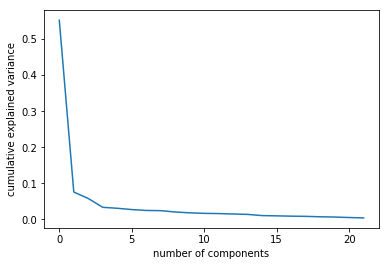

In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show();

#####  From the scree plot we can see that the first 3 components explain majority of the variation in the data. But for our data we will work with the 22 components (the dataset for test and train are: X_red_data, X_red_data_test

<b>Reducing dimensionality does lose some information in our case 2% of the variation, so even though it will speed up training, it may also make our system perform slightly worse in theory. 

##   A. KNN Regression

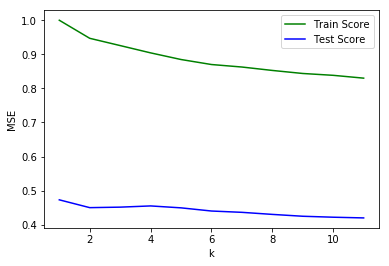

In [100]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,12):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_red_data, y_train)
    train_score_array.append(knn_reg.score(X_red_data, y_train))
    test_score_array.append(knn_reg.score(X_red_data_test, y_test))

x_axis = range(1,12)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE');

<font color=blue> Best Parameter for KNN Regressor: <b> N_Neighbors = 1 </b>

#### <font color=blue> Plotting true values vs predicted values - KNN (n_neighbors = 1)

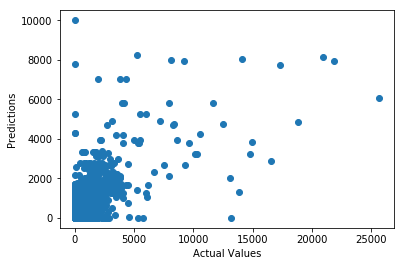

In [101]:
knnreg = KNeighborsRegressor(n_neighbors=1)
knnreg.fit(X_red_data, y_train)
predictions = knnreg.predict(X_red_data_test)
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

####  RMSE- KNN

In [102]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = knnreg.predict(X_red_data_test)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

474.5756791372638

####  Checking Cross Validation Score- KNN

In [116]:
from sklearn.model_selection import cross_val_score,cross_val_predict
scores = cross_val_score(knnreg, X_red_data, y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cv score: {}".format(scores.mean()))
predictions = cross_val_predict(knnreg, X_red_data_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)
print("Cross-Predicted Accuracy :"+ str(accuracy))

Cross validation scores: [0.75344243 0.83797184 0.84072173 0.81131269 0.75794416]
Average cv score: 0.8002785682582397
Cross-Predicted Accuracy :0.7430950813967827


 The average cross validation score from the KNN regressor with n_neighbors = 1 is <b>  0.8002785682582397 </b> , Cross Predicted Accuracy is <b> 0.7430950813967827 </b>and RMSE is <b> 474.5756791372638 </b>. 

##  B. Linear Regression

In [108]:
import numpy as np
from sklearn.linear_model import LinearRegression

Reg = LinearRegression()
Reg.fit(X_red_data, y_train)
y_predict = Reg.predict(X_red_data_test)
print("\n")
print("lr.coef_: {}".format(Reg.coef_))
print("lr.intercept_: {}".format(Reg.intercept_))
print("\n")
print('Train Data score: {}'
     .format(Reg.score(X_red_data, y_train)))
print('Test Data score/ R Square: {}'
     .format(Reg.score(X_red_data_test, y_test)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)



lr.coef_: [ 5.45268657e+02 -9.43193243e+00 -1.26623333e+00 -5.78368489e-01
  2.17119130e+00  1.62276149e+00  4.38542292e+00 -1.51320832e+02
 -6.14464778e+00 -3.72390869e+00  3.21156820e+01  1.13537151e+01
  2.25083805e-01 -2.66964745e+00 -4.76486074e+01 -3.89045124e+01
  4.01203705e+00  3.94785472e+01  8.90584227e+00  1.08840068e+02
  3.17840226e+01 -5.53109575e+00]
lr.intercept_: 187.14830974742173


Train Data score: 0.9182078139641526
Test Data score/ R Square: 0.7620650258770237


####  Creating a scatter plot for predicted and actual values

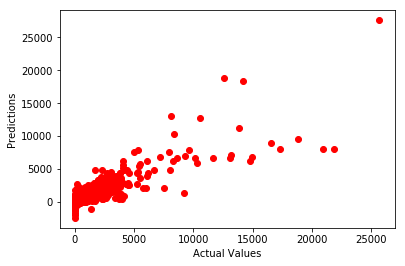

In [109]:
Reg = LinearRegression()
Reg.fit(X_red_data, y_train)
predictions = Reg.predict(X_red_data_test)
plt.scatter(y_test, predictions, color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

#### RMSE for Linear Regression

In [112]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = Reg.predict(X_red_data_test)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse


318.8699681444237

#### Checking Cross Validation Score- Regression

In [117]:
scores = cross_val_score(Reg, X_red_data, y_train, cv=10)
print("Cross validation scores: {}".format(scores))
print('\n')
print("Average cross-validation score: {}".format(scores.mean()))
predictions = cross_val_predict(Reg, X_red_data_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)
print("Cross-Predicted Accuracy :"+ str(accuracy))

Cross validation scores: [0.91643036 0.94440177 0.93787462 0.93885738 0.87277296 0.94114209
 0.84926501 0.91797536 0.90983643 0.44924025]


Average cross-validation score: 0.8677796222102998
Cross-Predicted Accuracy :0.9397074697228281


The average cross validation score from the Linear Regression is <b>  0.8677796222102998 </b> , Cross Predicted Accuracy is <b> 0.9397074697228281 </b>and RMSE is <b> 318.8699681444237 </b>. 

##  C. Ridge Regression

In [119]:
#default alpha of 1.0
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_red_data,y_train)

print('Ridge regression  model coeff (w):\n{}'
      .format(ridge.coef_))
print('\n')

print('Ridge Regression linear intercept (b):\n {:.3f}'
      .format(ridge.intercept_))
print('\n')

print('R-squared score (training set): {:.3f}'
       .format(ridge.score(X_red_data, y_train)))
print('\n')

print('R-squared score (test set): {:.3f}'
       .format(ridge.score(X_red_data_test,y_test)))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge regression  model coeff (w):
[ 5.45254703e+02 -9.43169106e+00 -1.26620092e+00 -5.78353688e-01
  2.17113574e+00  1.62271997e+00  4.38531070e+00 -1.51316959e+02
 -6.14449054e+00 -3.72381339e+00  3.21148601e+01  1.13534245e+01
  2.25078045e-01 -2.66957913e+00 -4.76473881e+01 -3.89035168e+01
  4.01193438e+00  3.94775369e+01  8.90561437e+00  1.08837282e+02
  3.17832092e+01 -5.53095420e+00]


Ridge Regression linear intercept (b):
 187.148


R-squared score (training set): 0.918


R-squared score (test set): 0.762


####  Grid Search for Ridge

In [120]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[0.01, 1, 5, 10, 100, 1000]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_red_data, y_train)

print(' \n Best parameter: {}'.format(grid_search.best_params_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 1, 5, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

 
 Best parameter: {'alpha': 1000}


In [121]:
param_grid = {'alpha':[500,700,900,1100,1500,2000]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_red_data, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [500, 700, 900, 1100, 1500, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameters: {'alpha': 2000}


In [124]:
param_grid = {'alpha':[2000,2500,2600,2700,2800,2900,3000,5000,10000]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_red_data, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [2000, 2500, 2600, 2700, 2800, 2900, 3000, 5000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameters: {'alpha': 3000}


Best Parameter for Ridge Regressor is Alpha = 3000

####  Creating a scatter plot for predicted and actual values

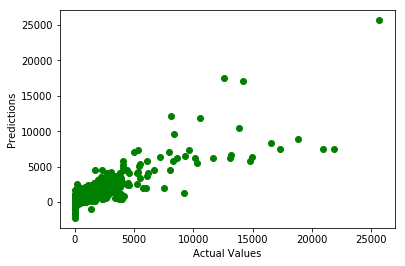

In [126]:
ridge = Ridge(alpha=3000)
ridge.fit(X_red_data, y_train)
predictions = grid_search.predict(X_red_data_test)
plt.scatter(y_test, predictions, color='Green')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

#### RMSE for Ridge

In [127]:
ridge.fit(X_red_data, y_train)
predictions = ridge.predict(X_red_data_test)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

Ridge(alpha=3000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

319.99299117235563

####  Checking Cross Validation Score- Ridge

In [147]:
scoresr = cross_val_score(ridge, X_red_data, y_train, cv=5)
print("Cross validation scores: {}".format(scoresr))
print('\n')
print("Average cross-validation score: {}".format(scoresr.mean()))
predictions = cross_val_predict(ridge, X_red_data_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)
print("Cross-Predicted Accuracy :"+ str(accuracy))

Cross validation scores: [0.91919566 0.9287018  0.91150599 0.86922166 0.81367243]


Average cross-validation score: 0.8884595082167893
Cross-Predicted Accuracy :0.9111031268347294


The average cross validation score from Ridge is <b>  0.8884595082167893 </b> , Cross Predicted Accuracy is <b> 0.9111031268347294 </b>and RMSE is <b> 319.99299117235563 </b>. 

##  D. LASSO

defaut alpha = 0

In [135]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_red_data,y_train)
print('Lasso regression linear model coeff (w):{}'
      .format(lasso.coef_))
print('\n')

print('Lasso Regression linear model intercept (b): {:.3f}'
      .format(lasso.intercept_))
print('R-squared score (training): {}'
       .format(lasso.score(X_red_data, y_train)))
print('\n')

print('R-squared score (test): {}'
       .format(lasso.score(X_red_data_test, y_test)))
print('\n')

print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_red_data), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Lasso regression linear model coeff (w):[ 5.44268631e+02 -8.43190684e+00 -2.66207736e-01 -0.00000000e+00
  1.17116571e+00  6.22735901e-01  3.38539733e+00 -1.50320806e+02
 -5.14462219e+00 -2.72388309e+00  3.11156564e+01  1.03536895e+01
  0.00000000e+00 -1.66962186e+00 -4.66485818e+01 -3.79044868e+01
  3.01201146e+00  3.84785216e+01  7.90581668e+00  1.07840042e+02
  3.07839970e+01 -4.53107016e+00]


Lasso Regression linear model intercept (b): 187.148
R-squared score (training): 0.9181527389139386


R-squared score (test): 0.7631310826931769


Number of features used: 20
Features with non-zero weight (sorted by absolute magnitude):
	0, 544.269
	7, -150.321
	19, 107.840
	14, -46.649
	17, 38.479
	15, -37.904
	10, 31.116
	20, 30.784
	11, 10.354
	1, -8.432
	18, 7.906
	8, -5.145
	21, -4.531
	6, 3.385
	16, 3.012
	9, -2.724
	13, -1.670
	4, 1.171
	5, 0.623
	2, -0.266


####   Grid Search for Lasso

In [137]:
lasso = Lasso(max_iter = 10000).fit(X_red_data, y_train)
param_grid = {'alpha':[0.5, 1, 2, 3, 5, 10, 50,100]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_red_data, y_train)
print('\n')
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.5, 1, 2, 3, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)



Best parameters: {'alpha': 0.5}
Best score: 0.8663122341603345


In [141]:
lasso = Lasso(max_iter = 10000).fit(X_red_data, y_train)
param_grid = {'alpha':[0.0001, 0.001,0.01,0.1,0.2,0.4,0.5]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_red_data, y_train)
print('\n')
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)



Best parameters: {'alpha': 0.0001}
Best score: 0.8666579332475488


In [144]:
#update alpha value from above
lasso = Lasso(alpha=0.0001).fit(X_red_data, y_train)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))
print('Features with weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_red_data), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Number of features used: 22
Best parameters: {'alpha': 0.0001}
Best score: 0.8666579332475488
Features with weight (sorted by absolute magnitude):
	0, 545.269
	7, -151.321
	19, 108.840
	14, -47.649
	17, 39.478
	15, -38.904
	10, 32.116
	20, 31.784
	11, 11.354
	1, -9.432
	18, 8.906
	8, -6.145
	21, -5.531
	6, 4.385
	16, 4.012
	9, -3.724
	13, -2.670
	4, 2.171
	5, 1.623
	2, -1.266
	3, -0.578
	12, 0.225


 Best Parameter for Lasso Regressor: <b> alpha= 0.0001    ;  Optimal Number of Features: 22 </b>

#### Creating a scatter plot for predicted and actual values

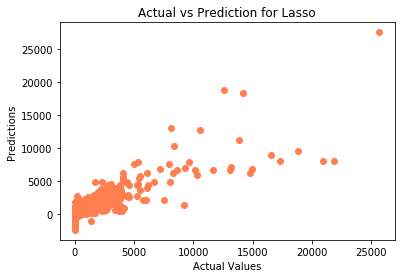

In [145]:
#Plotting chart for predicted and actual values
lasso = Lasso(alpha=0.0001).fit(X_red_data, y_train)
predictions = lasso.predict(X_red_data_test)
plt.scatter(y_test, predictions, color='Coral')
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title('Actual vs Prediction for Lasso');

####  RMSE for Lasso

In [146]:
predictions = lasso.predict(X_red_data_test)
rmse= sqrt(mean_squared_error(y_test , predictions))
rmse

318.86989761357955

#### Checking Cross Validation Score- Lasso

In [148]:
scorelass = cross_val_score(lasso, X_red_data, y_train, cv=5)
print("Cross validation scores: {}".format(scorelass))
print('\n')
print("Average cross-validation score: {}".format(scorelass.mean()))
predictions = cross_val_predict(lasso, X_red_data_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)
print("Cross-Predicted Accuracy :"+ str(accuracy))

Cross validation scores: [0.92836568 0.93788771 0.92026933 0.87238811 0.67436183]


Average cross-validation score: 0.8666545311358249
Cross-Predicted Accuracy :0.9397074765515093


 The average cross validation score from Lasso is <b>  0.8666545311358249 </b> , Cross Predicted Accuracy is <b> 0.939707476551509 </b>and RMSE is <b> 318.86989761357955 </b>. 

## E. Polynomial regression

In [152]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

X_train_pol= poly.fit_transform(X_red_data)
X_test_pol = poly.fit_transform(X_red_data_test)
X_red_data.shape
X_red_data_test.shape
X_train_pol.shape
X_test_pol.shape


(39077, 22)

(19248, 22)

(39077, 276)

(19248, 276)

In [153]:
from sklearn.linear_model import LinearRegression
Reg = LinearRegression()
Reg.fit(X_train_pol, y_train)
print('\n')
print('(poly deg 2) linear model intercept (b): {}'
     .format(Reg.intercept_))
print('(poly deg 2) R-squared score (training): {}'
     .format(Reg.score(X_train_pol, y_train)))
print('(poly deg 2) R-squared score (test): {}\n'
     .format(Reg.score(X_test_pol, y_test)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)



(poly deg 2) linear model intercept (b): -120.5631740345766
(poly deg 2) R-squared score (training): 0.9557193729717899
(poly deg 2) R-squared score (test): -1141.0762578519466



Our model performs well on the training set but it's prediction is extremely poor. Our model is suffering from over-fitting. We often use polynomial features in combination with regression that has a regularization penalty, like ridge regression

In [156]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_pol, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(ridge.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {}'
     .format(ridge.intercept_))
print('\n')
print('(poly deg 2 + ridge) R-squared score (training): {}'
     .format(ridge.score(X_train_pol, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {}'
     .format(ridge.score(X_test_pol, y_test)))

(poly deg 2 + ridge) linear model coeff (w):
[ 0.00000000e+00 -2.71320616e+01  2.75171900e+02 -2.28055272e+02
 -6.26760439e+00  5.40985784e+01  3.97136888e+01 -2.62069541e+02
 -1.35179885e+02  6.34429465e+01 -2.73356060e+02  1.85920388e+02
  2.05833613e+02 -1.53719967e+02  8.00978794e+01 -1.53747136e+02
  2.92382954e+02 -7.29351366e+01 -4.54563967e+01  1.21102063e+01
  1.90063549e+02 -8.85818225e+01  3.74157401e+01  2.21428491e+02
  8.92511390e+02 -7.12929114e+02  5.08902159e+01  2.29894235e+02
  2.86580378e+01 -6.64938525e+02  1.96888501e+01  2.56969728e+02
 -7.74659010e+02 -1.44981874e+02  2.06444593e+02 -5.36324774e+02
  2.35075558e+02 -5.94578583e+02  8.92475725e+02 -2.05158615e+02
  1.25033090e+01  4.54155421e+00  2.79790343e+01  2.35915971e+01
  3.21345928e+01 -3.51256750e+01  5.56148329e+01 -1.72481703e+01
 -2.40666409e+01  1.05610318e+01 -1.75066014e+01  2.43384022e+02
 -5.45082293e+00  5.69897896e+00 -3.60040391e+02 -1.20288880e+02
 -7.21972584e+00  1.01823891e+01 -7.42005829e

#### Grid Search for Polynomial with Ridge

In [157]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {'alpha' : [0.01, 1, 5, 10, 50 , 100]}
grid_search = GridSearchCV(ridge, param_grid,cv=5)
grid_search.fit(X_train_pol, y_train)

print('Best parameter: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 1, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameter: {'alpha': 0.01}
Best score: -5.874859962540867


In [162]:
###### REVISE THIS AFTER OUTPUT FROM ABOVE
param_grid = {'alpha' : [0.000001,0.0001,0.001,0.01,0.05,0.1]}
grid_search = GridSearchCV(ridge, param_grid,cv=5)
grid_search.fit(X_train_pol, y_train)
print('Best parameter: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-06, 0.0001, 0.001, 0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameter: {'alpha': 1e-06}
Best score: -5.8482374477029495


Best Parameter for Polynomial with Ridge Regressor:  Alpha=1e-06, which is very small and the model performance on the test data is bad. Even with Ridge regression we have not solved the problem of over fitting
    

#### Creating a scatter plot for predicted and actual values


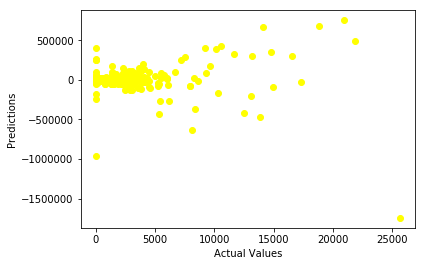

In [173]:
#plotting actual and predicted values for this regression
ridge=Ridge(alpha=1e-06)
ridge.fit(X_train_pol, y_train)
predictions = ridge.predict(X_test_pol)
plt.scatter(y_test, predictions, color='yellow')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

####  RMSE - Pol. with Ridge

In [177]:
predictions = ridge.predict(X_test_pol)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

22091.8269214348

#### Cross-Validation Pol. with Ridge

In [178]:
scoresp = cross_val_score(Ridge(), X_train_pol, y_train, cv=5)
print("Cross validation scores: {}".format(scoresp))
print('\n')
print("Average cross-validation score: {}".format(scoresp.mean()))
predictions = cross_val_predict(ridge,X_test_pol, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)
print("Cross-Predicted Accuracy :"+ str(accuracy))

Cross validation scores: [  0.74377132   0.90117028   0.91745977   0.6272011  -38.90147673]


Average cross-validation score: -7.1423748511001905
Cross-Predicted Accuracy :-0.03088840128105752


Average cross-validation score for Polynomial Regression with Ridge:<b> -7.1423748511001905</b>, which is extremely low. The Cross Predicted Accuracy is <b> -0.03088840128105752</b>and RMSE is <b> 22091.8269214348 </b>. Polynomial model with ridge is not working well with our PCA components. R2  is negative bacause Pol. with Ridge model does not follow the trend of the data, so it fits worse than a horizontal line.

##  F. SVM

#### i) Linear SVR

In [180]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR(random_state=10).fit(X_red_data, y_train)
print('Coefficients:\n', lsvr.coef_)
print('Intercepts:\n', lsvr.intercept_)

print('Accuracy of Linear SVR classifier on training set: {}'
     .format(lsvr.score(X_red_data, y_train)))
print('Accuracy of Linear SVR classifier on test set: {}'
     .format(lsvr.score(X_red_data_test, y_test)))

Coefficients:
 [ 5.31034713e+02 -1.12139432e+01  3.42793589e+00 -1.20182078e+00
  2.68095829e-01  1.42706010e+00  2.50893876e+00 -6.30844492e+01
 -2.54637119e+00 -1.15215802e+00 -4.47572259e+00 -2.65109100e+00
  9.47242978e-02  7.54289135e-01 -4.47318765e+01 -3.07876333e+01
  1.87686845e+00  2.94745983e+01  4.78090728e+00  5.89702230e+01
  1.05295804e+01 -8.79535260e+00]
Intercepts:
 [175.72082741]
Accuracy of Linear SVR classifier on training set: 0.8834560914721755
Accuracy of Linear SVR classifier on test set: 0.8298904053068455


#### Grid Search for Linear SVR

In [181]:
lsvr = LinearSVR(random_state=10).fit(X_red_data, y_train)
param_grid = {'C':[0.0001, 0.001, 0.01, 1, 10, 100, 1000],
             'epsilon': [100, 1000, 10000]}

grid_search = GridSearchCV(lsvr, param_grid, cv = 5)
grid_search.fit(X_red_data, y_train)

print('Best parameter of Linear SVR Regressor: {}'.format(grid_search.best_params_))
print('Best score of Linear SVR Regressor: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=10, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000], 'epsilon': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameter of Linear SVR Regressor: {'C': 1, 'epsilon': 100}
Best score of Linear SVR Regressor: 0.8827396942542076


In [182]:
lsvr = LinearSVR(random_state=10).fit(X_red_data, y_train)
param_grid = {'C':[1,3,5,7,9],
             'epsilon': [50,70,100,130,150,300,500,700]}

grid_search = GridSearchCV(lsvr, param_grid, cv = 5)
grid_search.fit(X_red_data, y_train)

print('Best parameter of Linear SVR Regressor: {}'.format(grid_search.best_params_))
print('Best score of Linear SVR Regressor: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=10, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 3, 5, 7, 9], 'epsilon': [50, 70, 100, 130, 150, 300, 500, 700]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameter of Linear SVR Regressor: {'C': 1, 'epsilon': 500}
Best score of Linear SVR Regressor: 0.8982968588103434


In [183]:
lsvr = LinearSVR(random_state=10).fit(X_red_data, y_train)
param_grid = {'C':[1,1.5],
             'epsilon': [350,400,500,550,600]}

grid_search = GridSearchCV(lsvr, param_grid, cv = 5)
grid_search.fit(X_red_data, y_train)

print('Best parameter of Linear SVR Regressor: {}'.format(grid_search.best_params_))
print('Best score of Linear SVR Regressor: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=10, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 1.5], 'epsilon': [350, 400, 500, 550, 600]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameter of Linear SVR Regressor: {'C': 1.5, 'epsilon': 550}
Best score of Linear SVR Regressor: 0.8991223526415576


Best Parameter for SVM SIMPLE KERNEL is <b> C = 1.5 and epsilon = 550 </b>

####  Creating a scatter plot for predicted and actual values


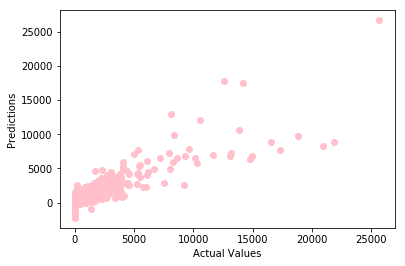

In [184]:
#plotting actual and predicted values for this regression
lsvr = LinearSVR(random_state=10,C = 1.5, epsilon= 550).fit(X_red_data, y_train)
predictions = lsvr.predict(X_red_data_test)
plt.scatter(y_test, predictions, color='Pink')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

####  RMSE - Linear SVR

In [186]:
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

304.6884244627

####  Cross- Validation - Linear SVR

In [188]:
score = cross_val_score(lsvr, X_red_data, y_train, cv=5)
print("Cross validation scores: {}".format(score))
print('\n')
print("Average cross-validation score: {}".format(score.mean()))
predictions = cross_val_predict(lsvr, X_red_data_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)
print("Cross-Predicted Accuracy :"+ str(accuracy))

Cross validation scores: [0.92605089 0.93378723 0.91717684 0.87895383 0.83963509]


Average cross-validation score: 0.8991207763545652
Cross-Predicted Accuracy :0.9254798254448733


 The average cross validation score from Linear SVR is <b>  0.8991207763545652 </b> , Cross Predicted Accuracy is <b> 0.9254798254448733 </b>and RMSE is <b> 304.6884244627 </b>. 

#### ii) SVM( With Kernel)

From previous Project, the best parameters for SVM with Kernels 
- Best Parameter for SVM (Linear) is C = 10 and epsilon = 5
- Best Parameter for SVM (RBF) is C = 400 and epsilon = 2
- Best Parameter for SVM (Poly) is C = 0.01 and epsilon = 0.001

 <b>a) SVM Linear Kernel

#### Creating a scatter plot for predicted and actual values


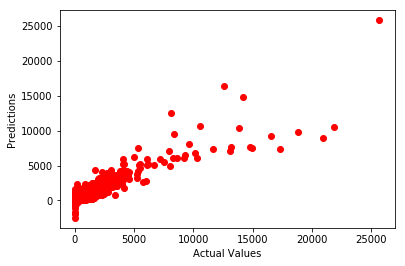

In [19]:
#plotting actual and predicted values for this regression
svrl = SVR(kernel = 'linear', epsilon=5, C=10).fit(X_red_data, y_train)
predictions = svrl.predict(X_red_data_test)
plt.scatter(y_test, predictions, color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

####  RMSE - SVM WITH KERNEL (Linear)

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

265.5072681546318

####  Cross- Validation - SVM WITH KERNEL (Linear)

In [21]:
score = cross_val_score(svrl, X_red_data, y_train, cv=5)
print("Cross validation scores: {}".format(score))
print('\n')
print("Average cross-validation score: {}".format(score.mean()))
predictions = cross_val_predict(svrl, X_red_data_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)
print("Cross-Predicted Accuracy :"+ str(accuracy))

Cross validation scores: [0.91665753 0.93382122 0.91888655 0.88284625 0.75354337]


Average cross-validation score: 0.8811509844444864
Cross-Predicted Accuracy :0.9358968983560418


 The average cross validation score from SVM WITH KERNEL (Linear) is <b>0.8811509844444864 </b>, Cross Predicted Accuracy is <b>0.9358968983560418</b> and RMSE is <b>265.5072681546318</b>.

 <b>b) SVM RBF Kernel

####  Creating a scatter plot for predicted and actual values

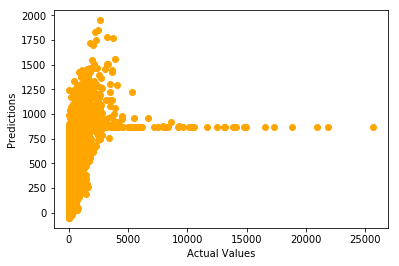

In [22]:
svmrbf = SVR(kernel = 'rbf', epsilon=2, C=400,gamma='auto').fit(X_red_data, y_train)
predictions = svmrbf.predict(X_red_data_test)
plt.scatter(y_test, predictions, color='orange')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

####  RMSE - SVM WITH KERNEL (RBF)

In [23]:
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

564.5689794627704

####  Cross- Validation - SVM WITH KERNEL (RBF)

In [24]:
scoresSVRBF = cross_val_score(svmrbf, X_red_data, y_train, cv=5)
print("Cross validation scores: {}".format(score))
print('\n')
print("Average cross-validation score: {}".format(score.mean()))
predictions = cross_val_predict(svmrbf, X_red_data_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)
print("Cross-Predicted Accuracy :"+ str(accuracy))

Cross validation scores: [0.91665753 0.93382122 0.91888655 0.88284625 0.75354337]


Average cross-validation score: 0.8811509844444864
Cross-Predicted Accuracy :0.3260407343911361


The average cross validation score from SVM WITH KERNEL (RBF) is <b>0.8811509844444864</b>, Cross Predicted Accuracy is <b> 0.3260407343911361 </b> and RMSE is <b>564.5689794627704</b>.

 <b>b) SVM Poly Kernel

####  Creating a scatter plot for predicted and actual values

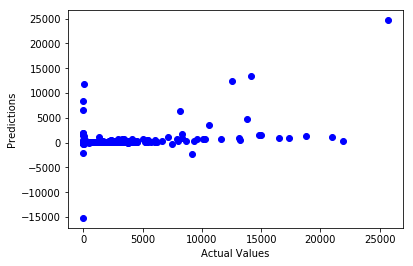

In [25]:
#plotting actual and predicted values for this regression
svrp = SVR(kernel = 'poly', epsilon=0.001, C=0.01, gamma='auto').fit(X_red_data, y_train)
predictions = svrp.predict(X_red_data_test)
plt.scatter(y_test, predictions, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

####  RMSE - SVM WITH KERNEL (Poly)

In [26]:
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

623.9601095291374

####  Cross- Validation - SVM WITH KERNEL (Poly)

In [27]:
scoresSVRBF = cross_val_score(svrp, X_red_data, y_train, cv=5)
print("Cross validation scores: {}".format(score))
print('\n')
print("Average cross-validation score: {}".format(score.mean()))
predictions = cross_val_predict(svrp, X_red_data_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)
print("Cross-Predicted Accuracy :"+ str(accuracy))

Cross validation scores: [0.91665753 0.93382122 0.91888655 0.88284625 0.75354337]


Average cross-validation score: 0.8811509844444864
Cross-Predicted Accuracy :0.3537301553693216


The average cross validation score from SVM WITH KERNEL (Poly) is <b> 0.8811509844444864 </b>, Cross Predicted Accuracy is <b>0.3537301553693216</b> and RMSE is <b>623.9601095291374</b>.

## G. SGD Regressor

In [27]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(model, param_grid,cv=5)
clf.fit(X_red_data, y_train)
print('\n')
print("Best score: " + str(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'loss': ['squared_loss', 'huber', 'epsilon_insensitive'], 'penalty': ['l2', 'l1', 'elasticnet'], 'learning_rate': ['constant', 'optimal', 'invscaling']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)



Best score: 0.8851061404099124
Best parameters: {'alpha': 1e-05, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l2'}


Best parameters: {'alpha': 1e-05, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l2'}

In [28]:
#Model with Best Parameters
sgd_reg = SGDRegressor(alpha= 1e-05, learning_rate = 'optimal',loss='epsilon_insensitive', penalty = 'l2')
sgd_reg.fit(X_red_data, y_train)
print(sgd_reg.score(X_red_data, y_train))
print(sgd_reg.score(X_red_data_test, y_test))

SGDRegressor(alpha=1e-05, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='epsilon_insensitive', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

0.8716016287919184
0.8309112964071839


####  Creating a scatter plot for predicted and actual values


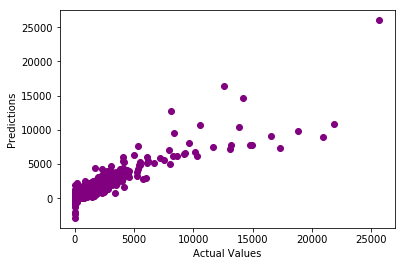

In [29]:
#plotting actual and predicted values for this regression
sgd_reg.fit(X_red_data, y_train)
predictions = sgd_reg.predict(X_red_data_test)
plt.scatter(y_test, predictions, color='purple')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

#### RMSE - SGD Regressor

In [32]:
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

264.15205631101963

#### Cross Validation Score for SGD Regressor

In [35]:
scoresSGD = cross_val_score(sgd_reg, X_red_data, y_train, cv=5)
print("Cross validation scores: {}".format(scoresSGD))
print('\n')
print("Average cross-validation score: {}".format(scoresSGD.mean()))
predictions = cross_val_predict(sgd_reg, X_red_data_test, y_test, cv= 5)
accuracy = metrics.r2_score(y_test, predictions)
print("Cross-Predicted Accuracy :"+ str(accuracy))

Cross validation scores: [0.92174544 0.93678058 0.91316292 0.87549529 0.71131985]


Average cross-validation score: 0.8717008178183352
Cross-Predicted Accuracy :0.9217358983927856


The average cross validation score from SGD Regressor is <b> 0.8717008178183352</b> , Cross Predicted Accuracy is <b> 0.9217358983927856 </b>and RMSE is <b>264.15205631101963 </b>. 

# <center>  Summary Of Scores for Models for Original Data
\begin{array}{rr} \hline 
Models &RMSE &CV-score &parameters   \\ \hline
KNN &432.7618402873267 &0.8959685412923699 &n=2  \\ \hline
Linear Reg &364.57580091346455 &0.9412184366030525 &  \\ \hline
Ridge &364.6232818436187 &0.9420333928839533 &alpha = 1600 \\ \hline
Lasso &362.5363236379406 &0.942481255087085 &alpha = 2.0 ; Optimal Number of Features: 32   \\ \hline
Polynomial(Ridge) &849.7014477276695 &0.06979345871869244 &alpha=10000  \\ \hline
SVM Simple &366.5371015037548 &0.9419837297295581  &C = 1.5 and epsilon = 30  \\ \hline
SVM (linear) &125.65592252511783 &0.8251494368006723 &  C = 10 and epsilon = 5  \\ \hline
SVM (RBF) &348.16114337857965 &0.15513368571868022 & C = 400 and epsilon = 2  \\ \hline
SVM (Poly) &1342.5838962883347 &-302.284677564801
 &C = 0.01 and epsilon = 0.001   \\ \hline
SGD &141.90913009607473 &0.9401854613052631 &'alpha': 0.001, 'learning_rate': 'optimal', 'loss':'epsilon_insensitive', 'penalty': 'l1'  \\ \hline
\end{array}

# <center>  Summary Of Scores for Models for Original Data
\begin{array}{rr} \hline 
Models &RMSE &CV-score &parameters &CV-Predicted-Accuracy   \\ \hline
KNN &474.5756791372638 &0.8002785682582397 &n=1 &0.7430950813967827 \\ \hline
Linear Reg &318.8699681444237 &0.8677796222102998 &  &0.9397074697228281\\ \hline
Ridge &319.99299117235563  &0.8884595082167893 &alpha = 3000 &0.9111031268347294 \\ \hline
Lasso &318.86989761357955  &0.8666545311358249 &alpha= 0.0001 ; Optimal Number of Features: 22  &0.939707476551509  \\ \hline
Polynomial(Ridge) &22091.8269214348 &-7.1423748511001905 &alpha = 1e-06 &-0.03088840128105752  \\ \hline
SVM Simple &304.6884244627 &0.8991207763545652  &C = 1.5 and epsilon = 550  &0.9254798254448733\\ \hline
SVM (linear) &265.5072681546318 &0.8811509844444864 &  C = 10 and epsilon = 5 &0.9358968983560418  \\ \hline
SVM (RBF) &564.5689794627704 &0.8811509844444864 & C = 400 and epsilon = 2 &0.3260407343911361  \\ \hline
SVM (Poly) &623.9601095291374 &0.8811509844444864 &C = 0.01 and epsilon = 0.001 &0.3537301553693216  \\ \hline
SGD &264.15205631101963 &0.8717008178183352 &'alpha': 1e-05, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l2 &0.9217358983927856 \\ \hline
\end{array}

<b>In the case of few algorithms transformed data doesn't work better but in some cases it does. For the best model that we had selected in project 2 'SDG Regressor' we noticed that the scores for RMSE and CV have gone down. After PCA tranformation, the model is slightly worse than with the data before transformation, which is understandable as we have lost some information in selection principal components.

 But in the case of Linear Regression, Ridge and Lasso the model after data transformation works better in terms of RMSE. This might be due to the fact that we had highly correlated features and for linear regression with regularization and without, the model performs worse since the features are correlated (which is not desirable), but in the case of principal component we have reduced these highly correlated features to 22 principal components that are not very correlated and they work well with these models and comply with these models underlying assumptions.
    
In the case of KNN, since we have reduced the majority of variation in components and the first components explains majority of the variation, we end up with only 1 n_neighbour and this would explain worse generalization of our model.

In the case of linear SVR, we see that our model again performs better after selecting principal components, this could be due to a possible reason that these transformed variables were now easy to segregate for the algo and hence better results.

# 4. Applying deep learning model

1) Sequential Model

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [19]:
from keras.wrappers.scikit_learn import KerasRegressor

def create_model_regressor():
    #create model
    model = Sequential()
    model.add(Dense(8, input_dim=22, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer = 'normal', activation = 'relu')) # hidden layer
    model.add(Dense(10, kernel_initializer = 'normal', activation = 'linear'))
    model.add(Dense(1, kernel_initializer='normal'))
    #compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model

In [20]:
#Model training
param_grid = {'epochs':[50, 100, 200] , 'batch_size':[20, 50, 100]}

In [21]:
model = KerasRegressor(build_fn = create_model_regressor , verbose = 0)

grid_search_Keras_Reg = GridSearchCV(model , param_grid , cv =5)

grid_search_Keras_Reg.fit(X_red_data, y_train)

print('Best parameters  {}'.format(grid_search_Keras_Reg.best_params_))

print('The Train R2 score is',r2_score(y_train, grid_search_Keras_Reg.predict(X_red_data)))
print('The Test R2 score is',r2_score(y_test, grid_search_Keras_Reg.predict(X_red_data_test)))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001D64ADC8710>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'epochs': [50, 100, 200], 'batch_size': [20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameters  {'epochs': 200, 'batch_size': 50}
The Train R2 score is 0.9486928947519025
The Test R2 score is 0.7686999666141561


In [25]:
dplr = model.fit(X_red_data,y_train,epochs=200,batch_size=50)

y_train_predict = model.predict(X_red_data)
y_test_predict = model.predict(X_red_data_test)

print('Train R2: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test R2: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train R2: 0.93
Test R2: 0.79


Text(0.5, 1.0, 'Cost function plot')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

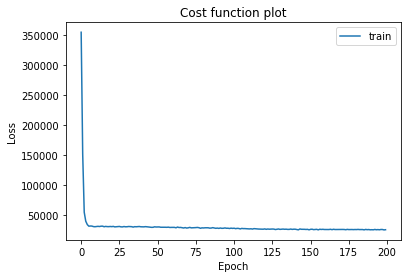

Text(0.5, 1.0, 'MSE Plot')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

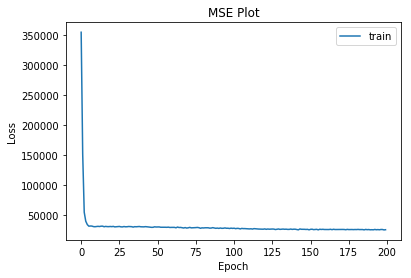

In [30]:
#Plotting the Cost Function - Loss 
plt.plot(dplr.history['loss'])
plt.title('Cost function plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# plotting the MSE
plt.plot(dplr.history['mean_squared_error'])
plt.title('MSE Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='Lower right')
plt.show()

We get a very high accuracy for the training set (0.93), however the accuracy for the test set is not quite as high (0.79)!
